Существует множество специальностей в области работы с данными, так как это достаточно широкая область. Некоторые из них:

1. Data Analyst (аналитик данных)
2. Data Scientist (ученый по данным)
3. Data Engineer (инженер данных)
4. Business Intelligence Analyst (аналитик бизнес-интеллекта)
5. Machine Learning Engineer (инженер машинного обучения)
6. Big Data Engineer (инженер больших данных)
7. Database Administrator (администратор баз данных)
8. Data Visualization Specialist (специалист по визуализации данных)
9. Data Architect (архитектор данных)
10. Quantitative Analyst (квантитативный аналитик)
11. Data Mining Engineer (инженер по добыче данных)
12. Predictive Analyst (аналитик прогнозирования)
13. Data Governance Analyst (аналитик управления данными)
14. Data Quality Analyst (аналитик качества данных)
15. Data Security Analyst (аналитик безопасности данных)
16. Data Warehousing Analyst (аналитик хранилища данных)

И другие.

Их можно разделить на следующие группы:

1. Аналитики данных - специалисты, которые занимаются анализом данных и построением статистических моделей для выявления закономерностей, трендов и прогнозирования будущих событий.

2. Инженеры данных - специалисты, которые отвечают за создание и поддержку инфраструктуры для хранения, обработки и передачи данных, в том числе баз данных, ETL-процессов и инструментов автоматизации.

3. Data-сайентисты - специалисты, которые обладают широкими знаниями в области анализа данных, статистики и машинного обучения, и могут решать сложные задачи в области предиктивной аналитики и машинного обучения.

4. Специалисты по визуализации данных - специалисты, которые занимаются созданием визуализаций для представления данных в понятном и наглядном виде.

5. Бизнес-аналитики - специалисты, которые занимаются анализом данных с целью оптимизации бизнес-процессов и принятия решений на основе данных.

6. Big Data-специалисты - специалисты, которые занимаются обработкой и анализом больших объемов данных, включая работу с распределенными системами хранения и обработки данных.

In [1]:
import requests                 # Библиотека работы с HTTP-запросами по API
import json                     # Для обработки полученных результатов запросов
import time                     # Для задержки между запросами
import os                       # Для работы с файлами
import pandas as pd             # Для формирования датафрейма с результатами
import re                       # Для работы с регулярными выражениями
import numpy as np              # Библиотека работы с массивами
import seaborn as sns           # Статистическая визуализация данных
import matplotlib.pyplot as plt # Визуализация данных
import plotly.graph_objs as go
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
import pymorphy2
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import random

In [2]:
# ## МОДУЛЬ ПАРСИНГА ВАКАНСИЙ С КРАТКИМ ОПИСАНИЕМ ##
# def get_vacancies(job_title, page=0, retries=5):
#     '''Функция запроса страницы.
#        job_title - наименование вакансии
#        page - Индекс страницы
#        retries - количество попыток повторения запроса
#        (по умолчанию начинается с первой страницы)'''

#     # Справочник для переменной GET-запроса
#     # Значения для указания значений в справочнике 
#     # указаны в документации к API hh.ru по ссылке: 
#     # https://github.com/hhru/api
#     params = {
#         'text': job_title,
#         'area': 113,
#         'page': page,
#         'per_page': 100
#     }

#     for i in range(retries):
#         try:
#             req = requests.get('https://api.hh.ru/vacancies', params, timeout=20)
#             data = req.content.decode()
#             req.close()
#             response = json.loads(data)
#             # Проверяем, что в ответе нет ошибки Bad Gateway
#             if 'errors' in response and any(error['type'] == 'bad_gateway' for error in response['errors']):
#                 print('Получена ошибка Bad Gateway. Повторяем через {retry_time} сек.')
#                 if i == retries - 1:
#                     print('Не удалось выполнить запрос. Проверьте соединение.')
#                     return None
#                 time.sleep(3 * (2 ** i))
#                 continue
#             return data
#         except requests.exceptions.RequestException as e:
#             print(f"Ошибка при запросе страницы {page}: {e}")
#             print(f"Попытка {i+1}/{retries}...")
#             time.sleep(0.25)

#     print(f"Не удалось получить данные для страницы {page}")
#     return None


# # Сделаем запрос к API hh.ru по вакансиям

# vacancies = []
# vacancies_ids = set()
# job_titles = [
#     "data engineer",
#     "инженер данных",
#     "data analyst",
#     "аналитик данных",
#     "аналитик",
#     "analyst",
#     "data",
#     "дата",
#     "data scientist",
#     "сайнтист",
#     "сайнс"
#     "BI",
#     "ETL"
# ]

# for job_title in job_titles:
#     for page in range(0, 100):
#         # Запрашиваем страницу с вакансиями
#         response = json.loads(get_vacancies(job_title, page))
#         # Получаем список вакансий на странице
#         items = response['items']
#         for item in items:
#             # Проверяем, что вакансия не была уже добавлена в список
#             if item['id'] not in vacancies_ids:
#                 # Проверяем, что в названии вакансии есть искомое слово
#                 if any(title in item['name'].lower() for title in job_titles):
#                     # Добавляем вакансию в список
#                     vacancies.append(item)
#                     # Добавляем id вакансии во множество уже просмотренных id
#                     vacancies_ids.add(item['id'])
#         # Проверяем, является ли страница последней
#         if response['pages'] - page <= 1:
#             break
#         # Делаем задержку между запросами
#         time.sleep(0.25)

# # Сохраняем полученные вакансии в файле
# with open('data/vacancies.json', 'w', encoding='utf-8') as f:
#     json.dump(vacancies, f, ensure_ascii=False, indent=4)

# print('Вакансии по запросу собраны и сохранены в файл vacancies.json')
# # Количество вакансий
# print(f"Количество собранных вакансий: {len(vacancies)}")

# # Количество уникальных значений ключа 'name'
# unique_names = set([v['name'] for v in vacancies])
# names_count = len(unique_names)

# print(f"Количество уникальных названий вакансий: {names_count}")

In [3]:
# ## ФУНКЦИЯ ПОЛУЧЕНИЯ ПОДРОБНОГО ОПИСАНИЯ ##
# # Теперь получим полные описания для всех собранных вакансий

# def get_description(vacancy_id):
#     url = f'https://api.hh.ru/vacancies/{vacancy_id}'
#     headers = {'User-Agent': 'Mozilla/5.0'}
#     description = ""

#     while True:
#         try:
#             response = requests.get(url, headers=headers)
#             if response.status_code == 200:
#                 data = response.json()
#                 description = data['description']
#                 time.sleep(0.5)
#                 break
#             elif response.status_code == 403:
#                 raise ValueError("Требуется решить капчу. Прекращение выполнения функции.")
#         except requests.exceptions.RequestException:
#             print(f"Ошибка получения описания вакансии {vacancy_id}. Повтор запроса через 0.2 секунды.")
#             time.sleep(0.2)
#             continue
    
#     return description

In [4]:
# # Чтение файла vacancies.json и создание словаря vacancies_dict
# with open('data/vacancies.json', 'r', encoding='utf-8') as f:
#     vacancies = json.load(f)
# vacancies_dict = {vacancy["id"]: "" for vacancy in vacancies}

In [5]:
# # Получим незагруженные описания вакансий

# # Обход словаря vacancies_dict и заполнение значениями ключа "description"
# # делаем это для вакансий, описание которых еще не получили 

# def fill_vacancy_descriptions(vacancies_dict):
#     for vacancy_id in vacancies_dict:
#         if not vacancies_dict[vacancy_id]:
#             try:
#                 vacancies_dict[vacancy_id] = get_description(vacancy_id)
#                 time.sleep(0.2)
#             except ValueError as e:
#                 print(e)
#                 break
#     return vacancies_dict

# filled_dict = fill_vacancy_descriptions(vacancies_dict)

In [6]:
# ## МОДУЛЬ ДОЗАПОЛНЕНИЯ

# # Чтение файла vacancies_with_descriptions.json и создание словаря vacancies_dict
# with open('data/vacancies_with_descriptions.json', 'r', encoding='utf-8') as f:
#     vacancies = json.load(f)
# vacancies_dict = {vacancy["id"]: vacancy["description"] for vacancy in vacancies}

# # заполняем описание вакансий, у которых в ключе дескрипшн пусто 
# def fill_vacancy_descriptions(vacancies_dict):
#     for id, description in vacancies_dict.items():
#         if not description:
#             try:
#                 new_description = get_description(id)
#                 if new_description:
#                     vacancies_dict[id] = new_description
#                     time.sleep(0.2)
#             except ValueError as e:
#                 print(e)
#                 break
#     return vacancies_dict

# filled_dict = fill_vacancy_descriptions(vacancies_dict)


In [7]:
# # Добавление ключа "description" для каждой вакансии, если его нет
# for vacancy in vacancies:
#     if "description" not in vacancy:
#         vacancy["description"] = ""

# # Запись описания вакансии в ключ "description", если его нет или он пустой
# for vacancy in vacancies:
#     if not vacancy["description"]:
#         vacancy_id = vacancy["id"]
#         description = vacancies_dict.get(vacancy_id, "")
#         if description:
#             vacancy["description"] = description


In [8]:
# # Сохранение результата в файл descriptions.json
# with open('data/descriptions.json', 'w', encoding='utf-8') as f:
#     json.dump(vacancies_dict, f, ensure_ascii=False, indent=4)

In [9]:
# # Здесь загрузим ранее собранные вакансии, добавим в них описание из 
# # vacancies_dict  


# #  Чтение файла vacancies.json и создание словаря vacancies
# with open('data/vacancies.json', 'r', encoding='utf-8') as f:
#     vacancies = json.load(f)

# # Добавление ключа "description" для каждой вакансии
# for vacancy in vacancies:
#     vacancy["description"] = ""

# # Запись описания вакансии в ключ "description"
# for vacancy in vacancies:
#     vacancy_id = vacancy["id"]
#     description = vacancies_dict.get(vacancy_id, "Описание вакансии не найдено")
#     vacancy["description"] = description

In [10]:
# # Сохранение результат в файл vacancies_with_descriptions.json
# with open('data/vacancies_with_descriptions.json', 'w', encoding='utf-8') as f:
#     json.dump(vacancies, f, ensure_ascii=False, indent=4)

In [11]:
# # счетчики в переменной vacancies_dict

# total_vacancies = len(vacancies_dict)
# empty_vacancies = sum(1 for desc in vacancies_dict.values() if not desc)
# filled_vacancies = sum(1 for desc in vacancies_dict.values() if desc)
# print(f'total: {total_vacancies}')
# print(f'filled: {filled_vacancies}')
# print(f'empty: {empty_vacancies}')

In [12]:
# # счетчики в переменной filled_dict

# total_vacancies = len(filled_dict)
# empty_vacancies = sum(1 for desc in filled_dict.values() if not desc)
# filled_in_filled = sum(1 for desc in filled_dict.values() if desc)
# print(f'total: {total_vacancies}')
# print(f'filled: {filled_in_filled}')
# print(f'empty: {empty_vacancies}')

In [13]:
# # счетчики в переменной vacancies

# total_in_vacancies = sum(1 for vacancy in vacancies if 'id' in vacancy)
# count_empty_description = len([vacancy for vacancy in vacancies if not vacancy['description']])
# count_filled_description = len([vacancy for vacancy in vacancies if vacancy['description']])
# print(f'total in vacancies: {total_in_vacancies}')
# print(f'empty in vacancies: {count_empty_description}')
# print(f'filled in vacancies: {count_filled_description}')

In [14]:
# # Проверим, попала ли в выборку вакансия, опубликованная на hh одной из последних:

# # Открываем файл с вакансиями и загружаем их в переменную vacancies
# with open('data/vacancies.json', 'r', encoding='utf-8') as f:
#     vacancies = json.load(f)

# # ID вакансии, которую нужно найти
# vacancy_id = '78954091'

# # Поиск вакансии по ID и вывод ее описания
# for vacancy in vacancies:
#     if vacancy['id'] == vacancy_id:
#         print("Вакансия:\n", vacancy['name'])
#         print("\nОбязанности:\n", vacancy['snippet']['responsibility'])
#         print("\nТребования:\n", vacancy['snippet']['requirement'])
#         break
# else:
#     print(f"Вакансия с номером {vacancy_id} не найдена")


In [15]:
# Далее загрузим вакансии в пандас датафрейм

# открываем json-файл и загружаем данные
with open('data/vacancies_with_descriptions.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# преобразуем json в pandas dataframe
df = pd.json_normalize(data)

In [16]:
# Сделаем так, чтобы выводились все столбцы датафрейма
pd.set_option('display.max_columns', None)

In [17]:
df.head(3)


,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,adv_response_url,alternate_url,relations,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,description,area.id,area.name,area.url,salary.from,salary.to,salary.currency,salary.gross,type.id,type.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.logo_urls,employer.vacancies_url,employer.trusted,snippet.requirement,snippet.responsibility,experience.id,experience.name,employment.id,employment.name,employer.logo_urls.original,employer.logo_urls.90,employer.logo_urls.240,salary,address.city,address.street,address.building,address.lat,address.lng,address.description,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,department.id,department.name,insider_interview.id,insider_interview.url
0,79110745,False,Data Engineer,NaN,False,False,NaN,None,None,2023-04-16T14:42:13+0300,2023-04-16T14:42:13+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/79110745?host=hh.ru,None,https://hh.ru/vacancy/79110745,[],None,None,[],[],[],True,"[{'id': '96', 'name': 'Программист, разработчи...",False,<p>Ищу <strong>Data Engineer</strong> в SportT...,1,Москва,https://api.hh.ru/areas/1,4000.0,6000.0,EUR,True,open,Открытая,5231648,4CV Recruitment Services,https://api.hh.ru/employers/5231648,https://hh.ru/employer/5231648,NaN,https://api.hh.ru/vacancies?employer_id=5231648,True,Разговорный английский. Опыт работы <highlight...,Взаимодействие с <highlighttext>data</highligh...,between3And6,От 3 до 6 лет,full,Полная занятость,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79120615,False,Data engineer,NaN,False,True,NaN,None,None,2023-04-16T17:13:22+0300,2023-04-16T17:13:22+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/79120615?host=hh.ru,None,https://hh.ru/vacancy/79120615,[],None,None,[],[],[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"<p>В крупную исследовательскую компанию, специ...",1,Москва,https://api.hh.ru/areas/1,180000.0,250000.0,RUR,False,open,Открытая,30486,РВИ,https://api.hh.ru/employers/30486,https://hh.ru/employer/30486,NaN,https://api.hh.ru/vacancies?employer_id=30486,True,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...",between1And3,От 1 года до 3 лет,full,Полная занятость,https://hhcdn.ru/employer-logo-original/225674...,https://hhcdn.ru/employer-logo/315944.png,https://hhcdn.ru/employer-logo/388801.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78934984,False,Data engineer (Стажер),NaN,False,False,NaN,None,None,2023-04-17T11:13:27+0300,2023-04-17T11:13:27+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/78934984?host=hh.ru,None,https://hh.ru/vacancy/78934984,[],None,None,[],[],[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,<p><strong>НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! Ч...,1,Москва,https://api.hh.ru/areas/1,NaN,NaN,NaN,NaN,open,Открытая,1789341,Sapiens solutions,https://api.hh.ru/employers/1789341,https://hh.ru/employer/1789341,NaN,https://api.hh.ru/vacancies?employer_id=1789341,True,Имеете высшее образование или заканчиваете учи...,По результатам обучения – обязательная защита ...,noExperience,Нет опыта,probation,Стажировка,https://hhcdn.ru/employer-logo-original/909827...,https://hhcdn.ru/employer-logo/4079995.png,https://hhcdn.ru/employer-logo/4079996.png,NaN,Москва,Нижняя Красносельская улица,40/12к2,55.774284,37.669145,NaN,"Москва, Нижняя Красносельская улица, 40/12к2",Бауманская,Арбатско-Покровск

Видим, что в столбце 'professional_roles' данные не нормализовались. Что бы разобрать вложенный список из professional_roles, применим к столбцу лямбда-функцию, разделим его на два новых столбца, старый удалим:

In [18]:
df[["professional_roles_id", "professional_roles_name"]] = df[
    "professional_roles"
].apply(
    lambda x: pd.Series(
        {"professional_roles_id": x[0]["id"], "professional_roles_name": x[0]["name"]}
    )
)
df = df.drop("professional_roles", axis=1)


In [19]:
# Выведем названия столбцов
print(df.columns)

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'address', 'response_url',
       'sort_point_distance', 'published_at', 'created_at', 'archived',
       'apply_alternate_url', 'insider_interview', 'url', 'adv_response_url',
       'alternate_url', 'relations', 'contacts', 'schedule', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'accept_incomplete_resumes', 'description', 'area.id', 'area.name',
       'area.url', 'salary.from', 'salary.to', 'salary.currency',
       'salary.gross', 'type.id', 'type.name', 'employer.id', 'employer.name',
       'employer.url', 'employer.alternate_url', 'employer.logo_urls',
       'employer.vacancies_url', 'employer.trusted', 'snippet.requirement',
       'snippet.responsibility', 'experience.id', 'experience.name',
       'employment.id', 'employment.name', 'employer.logo_urls.original',
       'employer.logo_urls.90', 'employer.logo_urls.240', 'salary',


In [20]:
# Проверим, какие столбцы не содержат данные
missing_cols = df.columns[df.isna().all()].tolist()
print(f'Столбцы без данных: {missing_cols}')

Столбцы без данных: ['department', 'address', 'response_url', 'sort_point_distance', 'insider_interview', 'adv_response_url', 'contacts', 'schedule', 'employer.logo_urls', 'salary', 'address.description', 'address.metro']


In [21]:
# Избавимся от них
df = df.drop(missing_cols, axis=1)

In [22]:
# Посмотрим 5 случайных вакансий набора
df.sample (n= 5)

,id,premium,name,has_test,response_letter_required,published_at,created_at,archived,apply_alternate_url,url,alternate_url,relations,working_days,working_time_intervals,working_time_modes,accept_temporary,accept_incomplete_resumes,description,area.id,area.name,area.url,salary.from,salary.to,salary.currency,salary.gross,type.id,type.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.vacancies_url,employer.trusted,snippet.requirement,snippet.responsibility,experience.id,experience.name,employment.id,employment.name,employer.logo_urls.original,employer.logo_urls.90,employer.logo_urls.240,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,insider_interview.id,insider_interview.url,professional_roles_id,professional_roles_name
5094,78954729,False,"Ведущий аналитик/Эксперт на внедрение 1С ERP, ...",False,False,2023-04-05T15:38:48+0300,2023-04-05T15:38:48+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,https://api.hh.ru/vacancies/78954729?host=hh.ru,https://hh.ru/vacancy/78954729,[],[],[],[],False,False,,2,Санкт-Петербург,https://api.hh.ru/areas/2,180000.0,NaN,RUR,False,open,Открытая,1473395,Райтек,https://api.hh.ru/employers/1473395,https://hh.ru/employer/1473395,https://api.hh.ru/vacancies?employer_id=1473395,True,Качества успешного кандидата: - Опыт работы с ...,Участие в крупных проектах внедрения 1С:ERP 2....,between3And6,От 3 до 6 лет,full,Полная занятость,https://hhcdn.ru/employer-logo-original/108675...,https://hhcdn.ru/employer-logo/5967657.png,https://hhcdn.ru/employer-logo/5967658.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Аналитик
2564,78557107,False,Специалист контроля качества / Аналитик в IT к...,False,False,2023-03-27T10:05:54+0300,2023-03-27T10:05:54+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,https://api.hh.ru/vacancies/78557107?host=hh.ru,https://hh.ru/vacancy/78557107,[],[],[],[],False,False,,2,Санкт-Петербург,https://api.hh.ru/areas/2,60000.0,NaN,RUR,False,open,Открытая,1113074,Облачные интернет сервисы,https://api.hh.ru/employers/1113074,https://hh.ru/employer/1113074,https://api.hh.ru/vacancies?employer_id=1113074,True,Желательно наличие высшего образования (специа...,"Составлять отчеты в Excel, осуществлять выгруз...",between1And3,От 1 года до 3 лет,full,Полная занятость,https://hhcdn.ru/employer-logo-original/386492...,https://hhcdn.ru/employer-logo/1988226.png,https://hhcdn.ru/employer-logo/1988227.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,"Секретарь, помощник руководителя, ассистент"
3945,79261016,False,Аналитик рынка,False,False,2023-04-13T14:12:28+0300,2023-04-13T14:12:28+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,https://api.hh.ru/vacancies/79261016?host=hh.ru,https://hh.ru/vacancy/79261016,[],[],[],[],False,False,,1,Москва,https://api.hh.ru/areas/1,NaN,NaN,NaN,NaN,open,Открытая,2637711,AWATERA,https://api.hh.ru/employers/2637711,https://hh.ru/employer/2637711,https://api.hh.ru/vacancies?employer_id=2637711,True,Опыт работы в аналогичной должности от 3 лет. ...,"Исследовать рынок, в интересных для нас отрасл...",between1And3,От 1 года до 3 лет,full,Полная занятость,https://hhcdn.ru/employer-logo-original/102814...,https://hhcdn.ru/employer-logo/5733356.png,https://hhcdn.ru/employer-logo/5733357.png,Москва,Золотая улица,11,55.779504,37.711258,"Москва, Золотая улица, 11",Электрозаводская,Арбатско-Покровская,3.161,3,55.782057,37.705300,"[{'station_name': 'Электрозаводская', 'line_na...",11374206,NaN,NaN,NaN,NaN,10,Аналитик
3872,77524398,False,Младший аналитик 1С,False,False,2023-04-17T11:26:42+0300,2023-04-17T11:26:42+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,https://api.hh.ru/vacancies/77524398?host=hh.ru,https://hh.ru/v

In [23]:
# Непонятный столбец
df['employer.trusted'].unique()

array([ True, False])

In [24]:
df.loc[df['employer.trusted'] == 'False']

,id,premium,name,has_test,response_letter_required,published_at,created_at,archived,apply_alternate_url,url,alternate_url,relations,working_days,working_time_intervals,working_time_modes,accept_temporary,accept_incomplete_resumes,description,area.id,area.name,area.url,salary.from,salary.to,salary.currency,salary.gross,type.id,type.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.vacancies_url,employer.trusted,snippet.requirement,snippet.responsibility,experience.id,experience.name,employment.id,employment.name,employer.logo_urls.original,employer.logo_urls.90,employer.logo_urls.240,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,insider_interview.id,insider_interview.url,professional_roles_id,professional_roles_name


Видим, что он содержит только одно значение, избавимся от него

In [25]:
df = df.drop('employer.trusted', axis=1)

In [26]:
df['employment.name'].unique()

array(['Полная занятость', 'Стажировка', 'Проектная работа',
       'Частичная занятость'], dtype=object)

In [27]:
# Избавимся от лишних (неинформативных) столбцов путем невключения их в 
# обновленный датафрейм (apply_alternate_url, url, area.url, type.id, employer.id,
# employer.url, employer.logo_urls, employment.id, employer.logo_urls.original,
# employer.logo_urls.90, employer.logo_urls.240, address.metro_stations, 
# address.id, department.id и другие)
# )

df = df[
    [
        "id",
        "name",
        "snippet.requirement",
        "snippet.responsibility",
        "description",
        "experience.name",
        "published_at",
        "created_at",
        "alternate_url",
        "working_days",
        "working_time_intervals",
        "working_time_modes",
        "accept_temporary",
        "employment.name",
        "professional_roles_name",
        "accept_incomplete_resumes",
        "department.name",
        "area.name",
        "salary.from",
        "salary.to",
        "salary.currency",
        "salary.gross",
        "type.name",
        "employer.name",
        "employer.alternate_url",
        "employer.vacancies_url",
        "address.city",
        "address.street",
        "address.building",
        "address.lat",
        "address.lng",
        "address.raw",
        "address.metro.station_name",
        "address.metro.line_name",
        "address.metro.station_id",
        "address.metro.line_id",
        "address.metro.lat",
        "address.metro.lng",
    ]
]

In [28]:
df.head(3)

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng
0,79110745,Data Engineer,Разговорный английский. Опыт работы <highlight...,Взаимодействие с <highlighttext>data</highligh...,<p>Ищу <strong>Data Engineer</strong> в SportT...,От 3 до 6 лет,2023-04-16T14:42:13+0300,2023-04-16T14:42:13+0300,https://hh.ru/vacancy/79110745,[],[],[],True,Полная занятость,"Программист, разработчик",False,NaN,Москва,4000.0,6000.0,EUR,True,Открытая,4CV Recruitment Services,https://hh.ru/employer/5231648,https://api.hh.ru/vacancies?employer_id=5231648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79120615,Data engineer,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...","<p>В крупную исследовательскую компанию, специ...",От 1 года до 3 лет,2023-04-16T17:13:22+0300,2023-04-16T17:13:22+0300,https://hh.ru/vacancy/79120615,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,180000.0,250000.0,RUR,False,Открытая,РВИ,https://hh.ru/employer/30486,https://api.hh.ru/vacancies?employer_id=30486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78934984,Data engineer (Стажер),Имеете высшее образование или заканчиваете учи...,По результатам обучения – обязательная защита ...,<p><strong>НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! Ч...,Нет опыта,2023-04-17T11:13:27+0300,2023-04-17T11:13:27+0300,https://hh.ru/vacancy/78934984,[],[],[],False,Стажировка,"BI-аналитик, аналитик данных",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Sapiens solutions,https://hh.ru/employer/1789341,https://api.hh.ru/vacancies?employer_id=1789341,Москва,Нижняя Красносельская улица,40/12к2,55.774284,37.669145,"Москва, Нижняя Красносельская улица, 40/12к2",Бауманская,Арбатско-Покровская,3.17,3,55.772405,37.67904


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5375 entries, 0 to 5374
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5375 non-null   object 
 1   name                        5375 non-null   object 
 2   snippet.requirement         5340 non-null   object 
 3   snippet.responsibility      5341 non-null   object 
 4   description                 5375 non-null   object 
 5   experience.name             5375 non-null   object 
 6   published_at                5375 non-null   object 
 7   created_at                  5375 non-null   object 
 8   alternate_url               5375 non-null   object 
 9   working_days                5375 non-null   object 
 10  working_time_intervals      5375 non-null   object 
 11  working_time_modes          5375 non-null   object 
 12  accept_temporary            5375 non-null   bool   
 13  employment.name             5375 

<!-- Также видим, что в столбцах snippet.requirement	и snippet.responsibility есть теги. Если в тексте снипета встретилась поисковая фраза (параметр text ), она будет подсвечена тегом highlighttext (из документации по API). Но нам эти теги ни к чему, избавимся от них: -->

In [30]:
# Уникальные значения в столбце рабочих ролей
df['professional_roles_name'].unique()

array(['Программист, разработчик', 'BI-аналитик, аналитик данных',
       'Системный инженер', 'Дата-сайентист', 'Другое', 'Аналитик',
       'Руководитель группы разработки', 'Администратор',
       'DevOps-инженер', 'Руководитель отдела аналитики',
       'Системный аналитик', 'Инженер по качеству',
       'Учитель, преподаватель, педагог', 'Сетевой инженер', 'Архитектор',
       'Тестировщик', 'Менеджер продукта', 'Продуктовый аналитик',
       'Бизнес-аналитик', 'Инженер-конструктор, инженер-проектировщик',
       'Менеджер по маркетингу, интернет-маркетолог',
       'Финансовый аналитик, инвестиционный аналитик',
       'Специалист по информационной безопасности',
       'Системный администратор', 'Руководитель проектов',
       'Оператор ПК, оператор базы данных',
       'Менеджер по продажам, менеджер по работе с клиентами',
       'Маркетолог-аналитик', 'Экономист',
       'Специалист службы безопасности',
       'Научный специалист, исследователь', 'Методолог', 'Аудитор',
    

В нем видим несколько нехарактерных для исследуемой области ролей

In [31]:
df.loc[df['professional_roles_name'] == 'Финансовый директор (CFO)']

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng
3335,79370981,Финансист-аналитик/Финансовый директор,Выбрали осознанно свой путь в финансовой сфере...,Ведение и автоматизация управленческого учета....,,От 3 до 6 лет,2023-04-17T09:56:26+0300,2023-04-17T09:56:26+0300,https://hh.ru/vacancy/79370981,[],[],[],False,Полная занятость,Финансовый директор (CFO),False,NaN,Казань,150000.0,NaN,RUR,True,Открытая,АНП Зенит,https://hh.ru/employer/1156752,https://api.hh.ru/vacancies?employer_id=1156752,Казань,"Ново-Савиновский район, Меридианная улица",1,55.817360,49.114328,"Казань, Ново-Савиновский район, Меридианная ул...",Козья слобода,Центральная,49.271,49,55.817608,49.097646
4186,78795027,Финансовый аналитик/менеджер в г. Сухум (Абхазия),11 лет на мебельном рынке. Уверенный пользоват...,Сбор и ведение управленческой отчётности. Подг...,,От 1 года до 3 лет,2023-04-01T16:38:03+0300,2023-04-01T16:38:03+0300,https://hh.ru/vacancy/78795027,[],[],[],False,Полная занятость,Финансовый директор (CFO),False,NaN,Ульяновск,70000.0,110000.0,RUR,False,Открытая,Салоны мебели и интерьера Домино,https://hh.ru/employer/9149474,https://api.hh.ru/vacancies?employer_id=9149474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4566,79360959,Accountant / Financial analyst,Наш идеальный кандидат или кандидатка — толков...,Мы ищем сильного специалиста в области бухучет...,,От 3 до 6 лет,2023-04-17T08:16:41+0300,2023-04-17T08:16:41+0300,https://hh.ru/vacancy/79360959,[],[],"[{'id': 'start_after_sixteen', 'name': 'Можно ...",True,Полная занятость,Финансовый директор (CFO),False,NaN,Санкт-Петербург,90000.0,NaN,RUR,False,Открытая,PropVue LLC,https://hh.ru/employer/5144086,https://api.hh.ru/vacancies?employer_id=5144086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,78413920,Финансовый аналитик (Middle/Senior/Lead),"Хорошее знание Excel. Знание 1С, SQL, <highlig...",Финансовый анализ результатов деятельности. Фи...,,От 3 до 6 лет,2023-04-17T20:54:28+0300,2023-04-17T20:54:28+0300,https://hh.ru/vacancy/78413920,[],[],[],False,Полная занятость,Финансовый директор (CFO),False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Тагес Джамп,https://hh.ru/employer/1480667,https://api.hh.ru/vacancies?employer_id=1480667,Москва,Велозаводская улица,13с2,55.710743,37.669612,"Москва, Велозаводская улица, 13с2",Автозаводская,Замоскворецкая,2.2,2,55.706634,37.657008


In [32]:
df.loc[
    df["professional_roles_name"].str.contains("Копирайтер, редактор, корректор"),
    ["id", "name", "snippet.requirement", "snippet.responsibility"],
]


,id,name,snippet.requirement,snippet.responsibility
2613,78836271,Райтер с опытом в сфере аналитики данных,"...сфере с IT, <highlighttext>аналитикой</high...",Написание текстовых материалов в разных жанрах...
4216,78299058,Редактор-аналитик (проект),Опыт работы с текстами — 100% must. Желательно...,Писать аналитические материалы: это может быть...


In [33]:
df.loc[
    df["professional_roles_name"].str.contains("по качеству"),
    ["id", "name", "snippet.requirement", "snippet.responsibility"],
]

,id,name,snippet.requirement,snippet.responsibility
127,77291257,Quality Reporting and Data Engineer,"University Degree. Advanced level in MS Word, ...",Develop and implement initiatives on automatio...
3050,78275725,Экономист / финансовый аналитик,"Умение собирать, анализировать, структурироват...",...предложений по снижению затрат. Коммуникаци...
4838,77018962,Ведущий инженер УПЗ (отдел аналитики эксплуата...,Знания в области эксплуатации авиационных двиг...,Ведение базы <highlighttext>данных</highlightt...


In [34]:
df.loc[
    df["name"].str.contains("УПЗ"),
    ["id", "name", "snippet.requirement", "snippet.responsibility"],
]

,id,name,snippet.requirement,snippet.responsibility
4838,77018962,Ведущий инженер УПЗ (отдел аналитики эксплуата...,Знания в области эксплуатации авиационных двиг...,Ведение базы <highlighttext>данных</highlightt...


In [35]:
# Подсчитаем количество каждой вакансии, выведем в порядке убывания

value_counts = df['name'].value_counts()
result = pd.DataFrame({'name': value_counts.index, 'count':value_counts.values})
result.sort_values(by='count', ascending=False, inplace=True)
print(result)


                                                   name  count
0                                              Аналитик    430
1                                       Бизнес-аналитик    255
2                                    Системный аналитик    181
3                                       Аналитик данных    142
4                                   Маркетолог-аналитик    112
...                                                 ...    ...
1160       Архитектор/Разработчик ETL (продукт RU Data)      1
1161  Solution Архитектор в DataOps платформу (Big D...      1
1162                          Assortment & Data Manager      1
1163                        Дата–партнер (Data Partner)      1
2716                Аналитик систем целевого маркетинга      1

[2717 rows x 2 columns]


In [36]:
# Посмотрим топ-25 названий вакансий
counts = df['name'].value_counts()
top_25 = counts.head(25)
print(top_25)

name
Аналитик                     430
Бизнес-аналитик              255
Системный аналитик           181
Аналитик данных              142
Маркетолог-аналитик          112
Data Engineer                 91
Финансовый аналитик           86
Экономист-аналитик            86
Аналитик отдела продаж        46
Data Scientist                42
Продуктовый аналитик          38
Ведущий аналитик              36
Data Analyst                  33
Аналитик BI                   31
Системный аналитик DWH        30
Младший аналитик              29
Аналитик бизнес-процессов     26
Data engineer                 25
Старший аналитик              21
Аналитик 1С                   21
Аналитик DWH                  20
Senior Data Scientist         19
Business Data Engineer        19
Product Analyst               17
Senior Data Engineer          16
Name: count, dtype: int64


Датафрейм помимо столбца с названиями вакансий содержит столбец с профессиональными ролями -- в отличие от названия, где работодатели пишут кто во что горазд, это поле заполняется из имеющегося на сайте набора ролей. Посмотрим на его содержимое.

In [37]:
df['professional_roles_name'].unique()

array(['Программист, разработчик', 'BI-аналитик, аналитик данных',
       'Системный инженер', 'Дата-сайентист', 'Другое', 'Аналитик',
       'Руководитель группы разработки', 'Администратор',
       'DevOps-инженер', 'Руководитель отдела аналитики',
       'Системный аналитик', 'Инженер по качеству',
       'Учитель, преподаватель, педагог', 'Сетевой инженер', 'Архитектор',
       'Тестировщик', 'Менеджер продукта', 'Продуктовый аналитик',
       'Бизнес-аналитик', 'Инженер-конструктор, инженер-проектировщик',
       'Менеджер по маркетингу, интернет-маркетолог',
       'Финансовый аналитик, инвестиционный аналитик',
       'Специалист по информационной безопасности',
       'Системный администратор', 'Руководитель проектов',
       'Оператор ПК, оператор базы данных',
       'Менеджер по продажам, менеджер по работе с клиентами',
       'Маркетолог-аналитик', 'Экономист',
       'Специалист службы безопасности',
       'Научный специалист, исследователь', 'Методолог', 'Аудитор',
    

In [38]:
mask_roles = df["professional_roles_name"].str.contains(
    "Учитель|безопасности|льготам|Юрист|архивариус|Секретарь|корректор|Бухгалтер|инженер-электрик|продавец-кассир|недвижимости|Юрисконсультант|инженер-механик|Охранник"
)
df.loc[
    mask_roles,
    [
        "id",
        "name",
        "alternate_url",
        "professional_roles_name",
        "snippet.requirement",
        "snippet.responsibility",
    ],
]

,id,name,alternate_url,professional_roles_name,snippet.requirement,snippet.responsibility
205,79470673,Assistant Professor - Data Science&AI (eng),https://hh.ru/vacancy/79470673,"Учитель, преподаватель, педагог",The Faculty of Computer Science and <highlight...,"Designing, Creating and Managing large volumes..."
212,79470559,Associate Professor - Data Science&AI (eng),https://hh.ru/vacancy/79470559,"Учитель, преподаватель, педагог",AI (Knowledge): 1. Expert Systems. 2. Fuzzy Lo...,"Designing, Creating and Managing large volumes..."
290,73328509,Assistant Professor - Data Science&AI (eng),https://hh.ru/vacancy/73328509,"Учитель, преподаватель, педагог",The Faculty of Computer Science and <highlight...,"Designing, Creating and Managing large volumes..."
297,73328814,Associate Professor - Data Science&AI (eng),https://hh.ru/vacancy/73328814,"Учитель, преподаватель, педагог",AI (Knowledge): 1. Expert Systems. 2. Fuzzy Lo...,"Designing, Creating and Managing large volumes..."
302,73328547,Assistant Professor - Data Science&AI (eng),https://hh.ru/vacancy/73328547,"Учитель, преподаватель, педагог",The Faculty of Computer Science and <highlight...,"Designing, Creating and Managing large volumes..."
...,...,...,...,...,...,...
5221,79137425,Сервисный специалист Дата-Центра,https://hh.ru/vacancy/79137425,"Сервисный инженер, инженер-механик",Базовых навыков работы на компьютере. Ответств...,С ИТ-оборудованием: маркируют и регистрируют в...
5229,79126735,Охранник дата-центр,https://hh.ru/vacancy/79126735,Охранник,Ответственное отношение к работе. Внимательнос...,Обеспечение безопасности охраняемого объекта. ...
5237,78818625,Дежурный инженер дата-центра,https://hh.ru/vacancy/78818625,Специалист по информационной безопасности,Закончили обучение по технической специальност...,Контролировать состояние оборудования через си...
5249,78718080,Сервисный специалист Дата-Центра,https://hh.ru/vacancy/78718080,"Сервисный инженер, инженер-механик",Базовых навыков работы на компьютере. Ответств...,С ИТ-оборудованием: маркируют и регистрируют в...


In [39]:
# Анализ показал, что вакансии нерелевантны, удаляем строки из датафрейма по маске
df.drop(df.loc[mask_roles].index, inplace=True)

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
# Посмотрим строки датафрейма, название вакансии которых содержат нехарактерные для DA, DE, DS слова

mask = df["name"].str.contains(
    "1С|УПЗ|Сухум|Java Developer|C#|Инженер DevOps|Инженер-геодезист|редактор"
)
df.loc[
    mask,
    [
        "id",
        "name",
        "alternate_url",
        "professional_roles_name",
        "snippet.requirement",
        "snippet.responsibility",
    ],
]


,id,name,alternate_url,professional_roles_name,snippet.requirement,snippet.responsibility
537,77999764,Senior Java Developer (CleverDATA/CDP-платформа),https://hh.ru/vacancy/77999764,"Программист, разработчик","Знания Core Java, коллекции, обработки исключе...",Участвовать в развитии продуктовой линейки ком...
538,79170579,QA инженер (C#) в команду Compliance Data Engi...,https://hh.ru/vacancy/79170579,Тестировщик,Опыт автоматизированного тестирования на C# от...,"Заниматься функциональным, интеграционным и ре..."
1174,76777161,Аналитик 1С,https://hh.ru/vacancy/76777161,Аналитик,Завершенные проекты с глубокой модификацией ст...,Сбор и формализация бизнес-требований заказчик...
1179,75521487,Бизнес-аналитик 1С,https://hh.ru/vacancy/75521487,Аналитик,Высшее профессиональное образование. Опыт рабо...,"Анализ входящих запросов от бизнес-заказчика, ..."
1188,76855842,Системный аналитик 1С MDM,https://hh.ru/vacancy/76855842,Системный аналитик,Опыт работы от 3-х лет в роли системного <high...,Взаимодействие с бизнесом для уточнения и форм...
1405,75882087,Аналитик 1С,https://hh.ru/vacancy/75882087,Аналитик,Аналогичный практический опыт работы. Практиче...,Собирать и систематизировать требования от пол...
2344,70000562,Системный аналитик 1С (Стажер),https://hh.ru/vacancy/70000562,Специалист технической поддержки,None,После внедрения клиент переводится на сопровож...
2361,76931129,Аналитик-стажер 1С,https://hh.ru/vacancy/76931129,Бизнес-аналитик,Тяги к развитию и совершенствованию своих навы...,...выполняя свои профессиональные задачи. Чере...
2399,79225653,Аналитик-маркетолог / Специалист по номенклату...,https://hh.ru/vacancy/79225653,Аналитик,"Аналитический склад ума, умение работать с бол...",Проведение анализа продуктового портфеля и лик...
2833,79085973,Консультант - Аналитик 1С,https://hh.ru/vacancy/79085973,Аналитик,"Желание развиваться, умение работать в режиме ...",Участвовать в проектах по внедрению 1С:Докумен...


Избавимся от нерелевантных вакансий, таких как Java Developer, Разработчик C#, Инженер DevOps и даже Инженер-геодезист, непонятно каким образом попавшей в выборку.

In [42]:
# Удаляем строки из датафрейма по маске
df.drop(df.loc[mask].index, inplace=True)


In [43]:
pd.reset_option('display.max_rows')

In [44]:
# Вновь посмотрим топ-25 названий вакансий
counts = df['name'].value_counts()
top_30 = counts.head(30)
print(top_30)

name
Аналитик                               429
Бизнес-аналитик                        252
Системный аналитик                     181
Аналитик данных                        142
Маркетолог-аналитик                    112
Data Engineer                           91
Финансовый аналитик                     86
Экономист-аналитик                      84
Аналитик отдела продаж                  44
Data Scientist                          42
Продуктовый аналитик                    38
Ведущий аналитик                        36
Data Analyst                            33
Аналитик BI                             31
Системный аналитик DWH                  30
Младший аналитик                        29
Аналитик бизнес-процессов               26
Data engineer                           25
Старший аналитик                        21
Аналитик DWH                            20
Business Data Engineer                  19
Senior Data Scientist                   19
Product Analyst                         17
Senior

Видим, что несколько названий можно объединить. Сделаем это позже.

Далее посмотрим различные статистические показатели выборки. Интереснее это будет делать, конечно же, на графиках

In [45]:
# Подсчет количества вакансий по валютам
currency_count = df['salary.currency'].value_counts()

# Подсчет количества вакансий по типу зарплаты
gross_count = df['salary.gross'].value_counts()

# Создание списка фигур для размещения двух диаграмм рядом
fig = go.Figure()

# Добавление первой круговой диаграммы (по валютам)
fig.add_trace(go.Pie(
    labels=['RUB', 'USD', 'EUR'],  # Метки для каждой валюты
    values=currency_count.values,  # Количество вакансий для каждой валюты
    hole=.7,  # Уменьшение размера отверстия внутри диаграммы
    name='Валюты',
    marker=dict(colors=['#70eaf5', '#aaaaaa', '#444444'], line=dict(width=0)),
    domain=dict(x=[0, 0.45])  # Изменение размера и положения диаграммы на фигуре
))

# Добавление второй круговой диаграммы (по типу зарплаты)
fig.add_trace(go.Pie(
    labels=['Net', 'Gross'],  # Метки для типов зарплаты
    values=gross_count.values,  # Количество вакансий для каждого типа зарплаты
    hole=.7,  # Уменьшение размера отверстия внутри диаграммы
    name='Тип зарплаты',
    marker=dict(colors=['#53b6e5', '#444444'], line=dict(width=0)),
    domain=dict(x=[0.55, 1])  # Изменение размера и положения диаграммы на фигуре
))

# Настройка параметров фигуры
fig.update_layout(
    title='Распределение вакансий по валютам и налогообложению',
    width=800,  # Ширина фигуры
    height=500,  # Высота фигуры
    grid=dict(rows=1, columns=2),
    legend=dict(title='Тип зарплаты', 
            traceorder='normal', 
            itemsizing='constant', 
            itemwidth=50),
    annotations=[dict(text='Валюты', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Налоги', x=0.84, y=0.5, font_size=20, showarrow=False)]

)

# Вывод фигуры
fig.show()

Разумеется, подавляющее большинство зарплат указана в рублях. Большая часть работодателей указывает выплаты после налогообложения, "на руки".

Далее рассмотрим распределение вакансий по городам.

In [46]:
d_grouped = df.groupby(['address.city']).count().sort_values(by='id', ascending=False)[:7]

labels = d_grouped.index[::-1]
values = d_grouped['id'].values[::-1]

fig = go.Figure(data=[go.Bar(x=values, y=labels, orientation='h', marker_color='#53b6e5')])

fig.update_xaxes(title_text='Количество вакансий')
fig.update_yaxes(title_text='Город')
fig.update_layout(title='Количество вакансий работников с данными по городам России')

fig.show()

Интересно сравнить количество вакансий с населением города. Иными словами, получить спрос на единицу жителя. Для этого Сделаем датафрейм с данными по населению городов согласно переписи 2021 (по данным Росстат https://rosstat.gov.ru)

In [47]:
population = pd.DataFrame(
    {
        "Город": [
            "Москва",
            "Санкт-Петербург",
            "Новосибирск",
            "Екатеринбург",
            "Казань",
            "Нижний Новгород",
            "Челябинск",
            "Красноярск",
            "Самара",
            "Уфа",
            "Ростов-на-Дону",
            "Омск",
            "Краснодар",
            "Воронеж",
            "Пермь",
            "Волгоград",
        ],
        "Население": [
            "13 010 112",
            "5 601 911",
            "1 633 595",
            "1 544 376",
            "1 308 660",
            "1 226 076",
            "1 189 525",
            "1 187 771",
            "1 173 299",
            "1 144 809",
            "1 142 162",
            "1 125 695",
            "1 099 344",
            "1 057 681",
            "1 034 002",
            "1 028 036",
        ],
    }
)


In [48]:
# Определяем топ-7 городов по количеству вакансий
d_grouped = (
    df.groupby(["address.city"]).count().sort_values(by="id", ascending=False)[:7]
)

# Соединяем данные о вакансиях и населении городов
merged_df = pd.merge(d_grouped, population, left_on="address.city", right_on="Город")

# Сортируем данные по количеству вакансий
merged_df = merged_df.sort_values(by="id", ascending=True)

# Масштабируем данные о населении в масштаб количества вакансий
pop_scaled = merged_df["Население"].str.replace(" ", "").astype(int) * (
    merged_df["id"].max()
    / merged_df["Население"].str.replace(" ", "").astype(int).max()
)


# Создаем график
fig = go.Figure()

# Добавляем столбчатую диаграмму количества вакансий
fig.add_trace(
    go.Bar(
        x=merged_df["id"],
        y=merged_df["Город"],
        orientation="h",
        name="Количество вакансий",
        marker_color="#53b6e5",
    )
)

# Добавляем столбчатую диаграмму населения городов
fig.add_trace(
    go.Bar(
        x=pop_scaled,
        y=merged_df["Город"],
        orientation="h",
        name="Население",
        marker_color="#767676",
    )
)

# Настраиваем внешний вид графика
fig.update_xaxes(title_text="Количество")
fig.update_yaxes(title_text="Город")
fig.update_layout(
    title="Количество вакансий и население по городам России",
    legend=dict(title="Данные"),
)

# Показываем график
fig.show()


 Видим, что вакансий работы с данными в Москве почти в 4,5 раза больше, чем Санкт-Петербурге, в 17 раз больше, чем в Новосибирске и в 22,6 раз больше, чем в Нижнем Новгороде. Причем, во все городах, кроме столицы, потребность в таких специалистах на душу населения в два и более раз ниже.

In [49]:
remote_ex = r'(удаленка|remote|удаленно|удаленн)'
 
df['remote'] = df['description'].str.contains(remote_ex)
df['office'] = ~df['remote']

In [50]:
remote_counts = df['remote'].value_counts()
office_counts = df['office'].value_counts()

labels = ['Удаленная работа', 'Офисная работа']

fig = go.Figure(data=[
    go.Pie(labels=labels, values=[remote_counts[True], office_counts[True]], 
           hole=.7, marker=dict(colors=['#2d2d2d', '#70eaf5'], line=dict(width=0)))])
fig.update_layout(title='Распределение вакансий по типу работы')
fig.show()


In [51]:
# Попробуем в собранных вакансиях выделить грейды
levels_dict = {
    "junior": r"(junior|джун|начинающ|стаж[её]р)",
    "middle": r"(middle|\Wмидл|миддл)",
    "senior": r"(senior|синьор|сеньор|\Wстарш)",
    "lead": r"(\Wlead\W|\Whead\W|\Wлид\W)",
}

for grade in levels_dict.keys():
    df[grade] = df["description"].str.contains(levels_dict[grade]) | df[
        "name"
    ].str.contains(levels_dict[grade])

total_vacancies = len(df)
total_with_grades = df[[*levels_dict.keys()]].sum().sum()
percent_grades = round(total_with_grades * 100 / total_vacancies)
print(
    f"Итого нашлось строк с грейдами {total_with_grades} из {total_vacancies} в датасете ({percent_grades} %)"
)
for grade in levels_dict.keys():
    print(f"Нашлось вакансий {grade}: {df[grade].sum()}")


Итого нашлось строк с грейдами 267 из 5180 в датасете (5 %)
Нашлось вакансий junior: 83
Нашлось вакансий middle: 87
Нашлось вакансий senior: 78
Нашлось вакансий lead: 19


Из всего числа имеющихся примеров датасета грейды удалось выделить лишь у 5%. Делаем вывод, что в дальнейшей работе эта сторона вакансий нерепрезентативна, использовать не будем.

In [52]:
fig = go.Figure(
    data=[
        go.Bar(
            x=list(levels_dict.keys()),
            y=df[[*levels_dict.keys()]].sum().values,
            marker_color="#53b6e5",
        )
    ]
)
fig.update_xaxes(title_text="Грейды")
fig.update_yaxes(title_text="Количество вакансий")
fig.update_layout(title="Количество вакансий по грейдам")

fig.show()

По имеющимся данным (разговоры на профильных каналах) можно сказать, что на рынке острая нехватка опытных специалистов. Наш график показывает, что максимальный спрос рынка на мидлов, далее идут начинающиие аналитики. Возможно, речь о том, что компании "режут косты" -- требования в вакансиях джунов часто удивляют. Плюс, лишь двадцатая часть вакансий располагает упоминаниями грейдов -- выборка нерепрезентативна.

In [53]:
# Зарплаты указаны в разных форматах (три валюты, гросс/нет, от/до)
# Пересчитаем зарплату по текущему курсу, после налогообложения, запишем в новый стобец


# Определение коэффициента валюты (по данным ЦБ РФ
# https://www.cbr.ru/currency_base/daily/)
df['currency_coef'] = df['salary.currency'].map({'EUR': 89.5, 'USD': 81.6, 'RUR': 1})

# Считаем salary_median и salary_net в зависимости от пропусков в столбцах "от" и "до"
for index, row in df.iterrows():
    if pd.notna(row['salary.from']) and pd.notna(row['salary.to']) and pd.notna(row['salary.currency']):
        salary_median = ((row['salary.from'] + row['salary.to']) / 2) * row['currency_coef']
        df.at[index, 'salary_median'] = salary_median
    elif pd.isna(row['salary.from']) and pd.notna(row['salary.to']) and pd.notna(row['salary.currency']):
        salary_median = row['salary.to'] * row['currency_coef']
        df.at[index, 'salary_median'] = salary_median
    elif pd.notna(row['salary.from']) and pd.isna(row['salary.to']) and pd.notna(row['salary.currency']):
        salary_median = row['salary.from'] * row['currency_coef']
        df.at[index, 'salary_median'] = salary_median

    if pd.notna(row['salary.currency']):
        salary_net = salary_median * 0.87 if row['salary.gross'] else salary_median
        df.at[index, 'salary_net'] = salary_net

In [54]:
df['salary.currency'].unique()

array(['EUR', 'RUR', nan, 'USD'], dtype=object)

In [55]:
df[df['salary.currency'].isnull()]

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
2,78934984,Data engineer (Стажер),Имеете высшее образование или заканчиваете учи...,По результатам обучения – обязательная защита ...,<p><strong>НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! Ч...,Нет опыта,2023-04-17T11:13:27+0300,2023-04-17T11:13:27+0300,https://hh.ru/vacancy/78934984,[],[],[],False,Стажировка,"BI-аналитик, аналитик данных",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Sapiens solutions,https://hh.ru/employer/1789341,https://api.hh.ru/vacancies?employer_id=1789341,Москва,Нижняя Красносельская улица,40/12к2,55.774284,37.669145,"Москва, Нижняя Красносельская улица, 40/12к2",Бауманская,Арбатско-Покровская,3.17,3,55.772405,37.679040,True,False,True,False,False,False,NaN,NaN,NaN
5,79380667,Junior Data Engineer,Профильное образование: информационные техноло...,"Реализация компонентов платформы, связанных с ...",<p>Мы разрабатываем аналитические системы на б...,От 1 года до 3 лет,2023-04-17T11:21:31+0300,2023-04-17T11:21:31+0300,https://hh.ru/vacancy/79380667,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,Открытая,Криптонит,https://hh.ru/employer/3491569,https://api.hh.ru/vacancies?employer_id=3491569,Санкт-Петербург,Уральская улица,4,59.950335,30.266048,"Санкт-Петербург, Уральская улица, 4",Василеостровская,Невско-Василеостровская,16.228,16,59.942577,30.278254,False,True,False,False,False,False,NaN,NaN,NaN
8,79380393,Junior Data Engineer,Профильное образование: информационные техноло...,"Реализация компонентов платформы, связанных с ...",<p>Мы разрабатываем аналитические системы на б...,От 1 года до 3 лет,2023-04-17T11:18:54+0300,2023-04-17T11:18:54+0300,https://hh.ru/vacancy/79380393,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Криптонит,https://hh.ru/employer/3491569,https://api.hh.ru/vacancies?employer_id=3491569,Москва,Шлюзовая набережная,4,55.731551,37.644261,"Москва, Шлюзовая набережная, 4",Павелецкая,Замоскворецкая,2.101,2,55.729741,37.638693,False,True,False,False,False,False,NaN,NaN,NaN
11,78370985,Data Engineer (Junior/Middle),"Интересуется Flink, пробовал применять его в п...",Обязанности: Анализ требований к витринам данн...,<p><strong>У нас все организовано в виде проду...,От 1 года до 3 лет,2023-04-17T16:54:25+0300,2023-04-17T16:54:25+0300,https://hh.ru/vacancy/78370985,[],[],[],False,Полная занятость,"Программист, разработчик",False,"билайн: ИТ, Data, Digital",Москва,NaN,NaN,NaN,NaN,Открытая,билайн,https://hh.ru/employer/4934,https://api.hh.ru/vacancies?employer_id=4934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,NaN,NaN,NaN
12,79466666,Data engineer,Знание SQL на высоком уровне. Знание Python. О...,Анализ требований к витринам данных (взаимодей...,<p><strong>Обязанности:</strong></p> <ul> <li>...,От 1 года до 3 лет,2023-04-18T14:55:20+0300,2023-04-18T14:55:20+0300,https://hh.ru/vacancy/79466666,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,ФИНАМ,https://hh.ru/employer/2682,https://api.hh.ru/vacancies?employer_id=2682,Москва,"Настасьинский переулок, д. 7, стр. 2",None,55.767899,37.604125,"Москва, Настасьинский переулок, д. 7, стр. 2",Пушкинская,Таганско-Краснопресненская,7.124,7,55.765607,37.604356,True,False,False,False,False,False

In [56]:
# Посчитаем медиану и количество вхождений для каждого уровня

result = pd.DataFrame()
for level in ['junior', 'middle', 'senior', 'lead']:
    mask = df[level]
    vacancies_with_salary = df[mask & ~df['salary_net'].isna()]
    median_salary = vacancies_with_salary['salary_net'].median()
    num_vacancies = len(vacancies_with_salary)
    result.loc[level, 'median_salary'] = median_salary
    result.loc[level, 'num_vacancies'] = num_vacancies

result['median_salary'] = result['median_salary'].map('{:,.0f}'.format)
result['num_vacancies'] = result['num_vacancies'].map('{:,.0f}'.format)
result = result.rename(columns={'median_salary': 'Медианная зарплата', 'num_vacancies': 'Количество вакансий'})


result


,Медианная зарплата,Количество вакансий
junior,"45,066",27
middle,"184,875",22
senior,"184,875",18
lead,"250,000",7


Равенство зарплат у мидлов и сеньоров, скорее, говорит о том, что выборка по грейдам нерепрезентативна и не отражает положение на рынке труда.

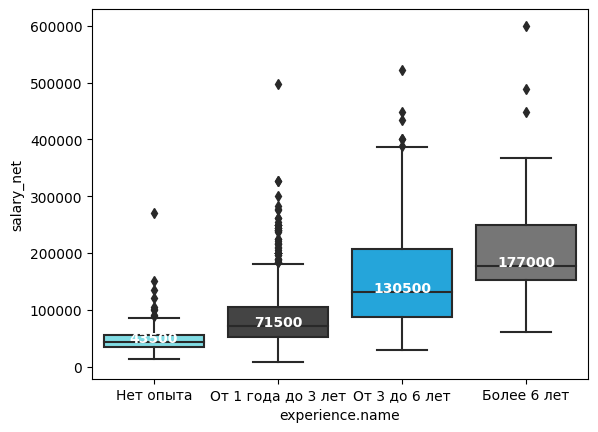

In [57]:
# Выведем ящики с усами по зарплатам, в зависимости от требуемого в вакансии опыта

category_order = ["Нет опыта", "От 1 года до 3 лет", "От 3 до 6 лет", "Более 6 лет"]
df["experience.name"] = pd.Categorical(
    df["experience.name"], categories=category_order, ordered=True
)

# Создание графика с новой палитрой
colors = ["#70eaf5", "#444444", "#07b1f8", "#767676"]
sns.boxplot(x="experience.name", y="salary_net", data=df, palette=colors)

# Вычисление и вывод медиан
medians = df.groupby(["experience.name"])["salary_net"].median().values
nobs = df["experience.name"].value_counts().values
for i, median in enumerate(medians):
    plt.text(
        i,
        median,
        f"{median:.0f}",
        horizontalalignment="center",
        size="medium",
        color="w",
        weight="bold",
    )
plt.show()


Ящики с усами показывают картину, которой можно верить: чем больше опыта, тем выше зарплата. Кандидатам без опыта в среднем готовы платить 43,5 тысяч рублей.    

Статистика по зарплатам

In [58]:
salary_count = "{:,.0f}".format(df['salary_net'].count()).replace(',', ' ')
salary_mean = "{:,.0f}".format(df['salary_net'].mean()).replace(',', ' ')
salary_median = "{:,.0f}".format(df['salary_net'].median()).replace(',', ' ')
salary_std = "{:,.0f}".format(df['salary_net'].std()).replace(',', ' ')
salary_min = "{:,.0f}".format(df['salary_net'].min()).replace(',', ' ')
salary_max = "{:,.0f}".format(df['salary_net'].max()).replace(',', ' ')

print(f"Количество вакансий с указанной зарплатой: {salary_count}")
print(f"Средняя зарплата: {salary_mean}")
print(f"Медиана зарплаты: {salary_median}")
print(f"Стандартное отклонение: {salary_std}")
print(f"Минимальная зарплата: {salary_min}")
print(f"Максимальная зарплата: {salary_max}")


Количество вакансий с указанной зарплатой: 1 680
Средняя зарплата: 101 127
Медиана зарплаты: 78 400
Стандартное отклонение: 72 629
Минимальная зарплата: 8 160
Максимальная зарплата: 600 000


In [59]:
x_labels = ['Количество вакансий', 'Минимальная зарплата', 
            'Стандартное отклонение', 'Медиана зарплаты', 'Средняя зарплата', 'Максимальная зарплата']

x_values = [salary_count, salary_min, salary_std, salary_median, salary_mean, salary_max]

fig = go.Figure(go.Bar(x=x_values, y=x_labels, orientation='h', marker=dict(color='#53b6e5')))

fig.update_layout(xaxis_title='Значение', yaxis_title=None, title='Характеристики зарплат в датасете')

fig.show()


Выборка для предсказания зарплаты мала, но можно попробовать это сделать

In [60]:
# Вакансия с минимальной запрлатой
df.nsmallest(1, 'salary_net')

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
4106,78963217,Аналитик криптофонда / DeFi аналитик,"Мы ищем только тех экспертов, у которых есть о...",Составлять резюме по проектам на основе анализ...,,От 1 года до 3 лет,2023-04-05T18:26:12+0300,2023-04-05T18:26:12+0300,https://hh.ru/vacancy/78963217,[],[],[],True,Проектная работа,"Финансовый аналитик, инвестиционный аналитик",True,NaN,Москва,100.0,NaN,USD,False,Открытая,Капустин Сергей Владимирович,https://hh.ru/employer/9726714,https://api.hh.ru/vacancies?employer_id=9726714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,81.6,8160.0,8160.0


In [61]:
# Вакансия с максимальной запрлатой
df.nlargest(1, 'salary_net')

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
5157,78275964,Data Architect,Практический опыт проектирования сложных инфор...,Наши решения объединяют в себе как обеспечение...,,Более 6 лет,2023-03-20T13:12:22+0300,2023-03-20T13:12:22+0300,https://hh.ru/vacancy/78275964,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,NaN,600000.0,RUR,False,Открытая,Wanted,https://hh.ru/employer/5174849,https://api.hh.ru/vacancies?employer_id=5174849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,1.0,600000.0,600000.0


In [62]:
# Зарплаты лидов по убыванию 
df.loc[(df['lead'] == True) & (df['salary_net'].notnull())].sort_values(by='salary_net', ascending=False)


,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
4,79084256,Data Engineer (lead),"Хорошее знание технологий из стека: Python, SQ...",Готовить данные для моделей машинного обучения...,<strong>Что нужно будет делать:</strong> <ul> ...,От 3 до 6 лет,2023-04-19T09:31:35+0300,2023-04-19T09:31:35+0300,https://hh.ru/vacancy/79084256,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,300000.0,400000.0,RUR,False,Открытая,Predicto,https://hh.ru/employer/4976750,https://api.hh.ru/vacancies?employer_id=4976750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,1.0,350000.0,350000.0
968,79171712,Senior Business Analyst,2+ years of experience as a Senior Business <h...,Prepare specifications describing a technical ...,<p>The main duties:</p> <ul> <li>Identify and ...,Более 6 лет,2023-04-11T16:33:47+0300,2023-04-11T16:33:47+0300,https://hh.ru/vacancy/79171712,[],[],[],False,Полная занятость,Аналитик,False,NaN,Москва,200000.0,350000.0,RUR,False,Открытая,Шеф Маркет,https://hh.ru/employer/988480,https://api.hh.ru/vacancies?employer_id=988480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,1.0,275000.0,275000.0
1583,78446701,Senior/Team Lead Data Scientist,3+ года опыта в роли <highlighttext>Data</high...,Заниматься исследованием и имплементацией разл...,<p>Для основного продукта <strong>Wallcraft</s...,От 3 до 6 лет,2023-03-23T12:00:23+0300,2023-03-23T12:00:23+0300,https://hh.ru/vacancy/78446701,[],[],[],False,Полная занятость,Системный аналитик,False,NaN,Пенза,NaN,250000.0,RUR,False,Открытая,Волкрафт,https://hh.ru/employer/896866,https://api.hh.ru/vacancies?employer_id=896866,Penza,Revolyutsionnaya Street,71,53.192868,45.006782,"Penza, Revolyutsionnaya Street, 71",NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,True,1.0,250000.0,250000.0
1661,78466689,Senior/Team Lead Data Scientist,3+ года опыта в роли <highlighttext>Data</high...,Заниматься исследованием и имплементацией разл...,<p>Для основного продукта <strong>Wallcraft</s...,От 3 до 6 лет,2023-03-23T16:24:39+0300,2023-03-23T16:24:39+0300,https://hh.ru/vacancy/78466689,[],[],[],False,Полная занятость,Системный аналитик,False,NaN,Санкт-Петербург,NaN,250000.0,RUR,False,Открытая,Волкрафт,https://hh.ru/employer/896866,https://api.hh.ru/vacancies?employer_id=896866,Penza,Revolyutsionnaya Street,71,53.192868,45.006782,"Penza, Revolyutsionnaya Street, 71",NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,1.0,250000.0,250000.0
779,78841306,Sales Operations Analyst,1-3+ years in Sales Operations Management in I...,"Help to drive discipline, hygiene and accuracy...",<p><strong>Hey!</strong></p> <p>We are Social ...,От 1 года до 3 лет,2023-04-18T14:27:32+0300,2023-04-18T14:27:32+0300,https://hh.ru/vacancy/78841306,[],[],[],False,Полная занятость,Другое,False,NaN,Москва,1200.0,NaN,USD,True,Открытая,SL KG,https://hh.ru/employer/9472269,https://api.hh.ru/vacancies?employer_id=9472269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,81.6,97920.0,85190.4
820,79118242,Product Researcher / Finance Analyst / Финансо...,Love to learn new skills and passionate about ...,Product research for an Amazon business. Analy...,"<p>We are an online e-commerce of cosmetics, w...",От 1 года до 3 лет,2023-04-10T16:28:35+0300,2023-04-10T16:28:35+0300,htt

In [63]:
# Топ-25 работодателей по количеству размещенных вакансий
df_top_employers = df['employer.name'].value_counts().nlargest(25).reset_index()

# Вывод графика
fig = px.bar(df_top_employers, x='employer.name', y='count', color_discrete_sequence=['#53b6e5'])

# Задание заголовка
fig.update_layout(title='Топ 25 работодателей')

# Задание меток осей
fig.update_xaxes(title='Работодатель')
fig.update_yaxes(title='Вакансий')

# Вывод графика
fig.show()


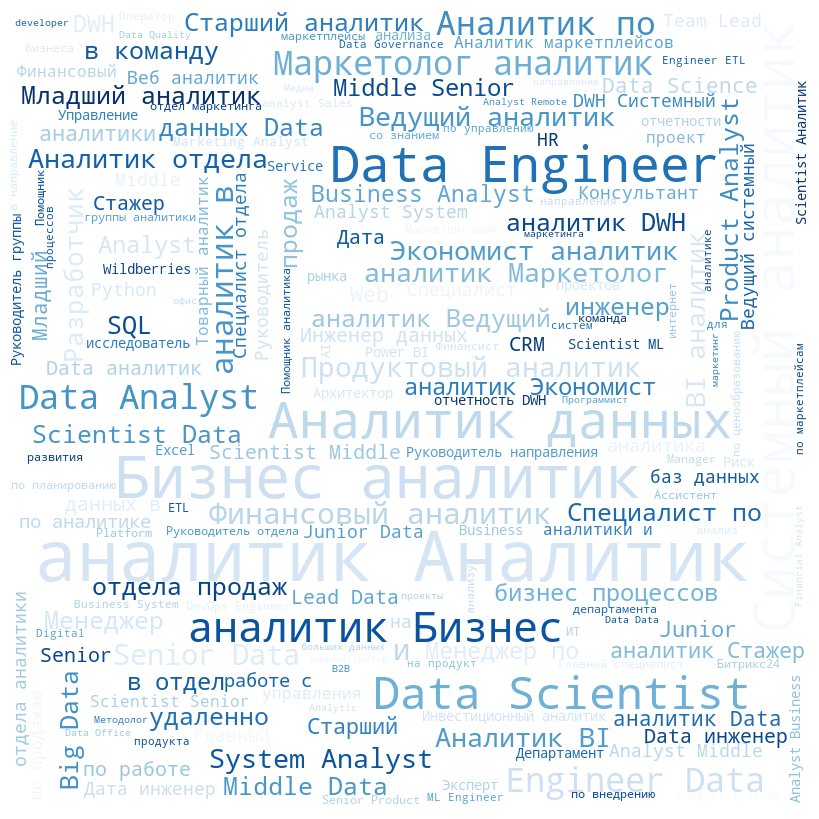

In [64]:
# Составим облако слов по полю названий вакансий

# Объединяем все строки в одну
text_roles = " ".join(df["name"])

# Создаем объект WordCloud
wordcloud = WordCloud(
    width=800, height=800, background_color="white", colormap="Blues_r", min_font_size=10
).generate(text_roles)

# Отображаем облако слов
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [65]:
# Переиндексируем даатфрейм
df = df.reset_index(drop=True)

In [66]:
df.head()

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
0,79110745,Data Engineer,Разговорный английский. Опыт работы <highlight...,Взаимодействие с <highlighttext>data</highligh...,<p>Ищу <strong>Data Engineer</strong> в SportT...,От 3 до 6 лет,2023-04-16T14:42:13+0300,2023-04-16T14:42:13+0300,https://hh.ru/vacancy/79110745,[],[],[],True,Полная занятость,"Программист, разработчик",False,NaN,Москва,4000.0,6000.0,EUR,True,Открытая,4CV Recruitment Services,https://hh.ru/employer/5231648,https://api.hh.ru/vacancies?employer_id=5231648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,89.5,447500.0,389325.0
1,79120615,Data engineer,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...","<p>В крупную исследовательскую компанию, специ...",От 1 года до 3 лет,2023-04-16T17:13:22+0300,2023-04-16T17:13:22+0300,https://hh.ru/vacancy/79120615,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,180000.0,250000.0,RUR,False,Открытая,РВИ,https://hh.ru/employer/30486,https://api.hh.ru/vacancies?employer_id=30486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,1.0,215000.0,215000.0
2,78934984,Data engineer (Стажер),Имеете высшее образование или заканчиваете учи...,По результатам обучения – обязательная защита ...,<p><strong>НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! Ч...,Нет опыта,2023-04-17T11:13:27+0300,2023-04-17T11:13:27+0300,https://hh.ru/vacancy/78934984,[],[],[],False,Стажировка,"BI-аналитик, аналитик данных",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Sapiens solutions,https://hh.ru/employer/1789341,https://api.hh.ru/vacancies?employer_id=1789341,Москва,Нижняя Красносельская улица,40/12к2,55.774284,37.669145,"Москва, Нижняя Красносельская улица, 40/12к2",Бауманская,Арбатско-Покровская,3.17,3,55.772405,37.679040,True,False,True,False,False,False,NaN,NaN,NaN
3,78954091,Data Engineer / Дата-инженер (Middle),Понимание и интерес к области больших данных. ...,Мероприятия для поддержания хорошего настроени...,"<p><strong><em>Приветствуем тебя, будущий учас...",От 1 года до 3 лет,2023-04-17T15:27:03+0300,2023-04-17T15:27:03+0300,https://hh.ru/vacancy/78954091,[],[],[],False,Полная занятость,Системный инженер,False,NaN,Москва,250000.0,300000.0,RUR,True,Открытая,Платформа Больших Данных,https://hh.ru/employer/5202841,https://api.hh.ru/vacancies?employer_id=5202841,Москва,4-я Тверская-Ямская улица,14с1,55.773393,37.595995,"Москва, 4-я Тверская-Ямская улица, 14с1",Белорусская,Кольцевая,5.20,5,55.775179,37.582303,True,False,False,False,False,False,1.0,275000.0,239250.0
4,79084256,Data Engineer (lead),"Хорошее знание технологий из стека: Python, SQ...",Готовить данные для моделей машинного обучения...,<strong>Что нужно будет делать:</strong> <ul> ...,От 3 до 6 лет,2023-04-19T09:31:35+0300,2023-04-19T09:31:35+0300,https://hh.ru/vacancy/79084256,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,300000.0,400000.0,RUR,False,Открытая,Predicto,https://hh.ru/employer/4976750,https://api.hh.ru/vacancies?employer_id=4976750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,1.0,350000.0,350000.0


In [67]:
# Сохраним получившийся датафрейм в csv
df.to_csv('data/df.csv', sep=',', encoding='utf-8')

## Кластеризация вакансий по их описанию

Далее попробуем разделить вакансии по специальностям на основе их описания.

Тематическое моделирование — это метод машинного обучения, который используется для выявления тем в больших коллекциях текстовых документов. Он позволяет автоматически выявлять скрытые темы в текстах и определять, какие слова и фразы связаны с каждой темой. Тематическое моделирование используется в различных областях, включая обработку естественного языка, информационный поиск, маркетинг и анализ социальных сетей. Оно может помочь упростить анализ больших объемов текстовых данных, позволяя выявить ключевые темы и понять, как они связаны между собой.

Кластеризация текстовых данных - это сложная задача машинного обучения, но можно использовать различные методы для ее решения. Вот несколько подходов:

1. Кластеризация на основе слов: вы можете использовать методы машинного обучения, такие как K-средних или DBSCAN, чтобы кластеризовать описания вакансий на основе слов в тексте. В этом случае вам нужно будет создать матрицу признаков, используя методы векторизации, такие как TF-IDF или Word2Vec, чтобы преобразовать текст в числовые значения. Затем можно использовать эти числа в качестве входных данных для алгоритма кластеризации.

2. Кластеризация на основе тем: другой подход - использовать тематическое моделирование для кластеризации описаний вакансий на основе тем, которые встречаются в тексте. Например, можно использовать методы LDA (Latent Dirichlet Allocation) или NMF (Non-Negative Matrix Factorization), чтобы найти темы, связанные с определенными профессиональными навыками или областями. Затем можно кластеризовать описания вакансий на основе этих тем.

3. Кластеризация на основе эмбеддингов: еще один подход - использовать предварительно обученные модели эмбеддингов (например, Word2Vec или GloVe), чтобы преобразовать текст в числовые векторы, представляющие значения слов. Затем можно использовать алгоритмы кластеризации, такие как DBSCAN или AgglomerativeClustering, чтобы кластеризовать описания вакансий на основе этих эмбеддингов.

### Кластеризация вакансий методами К-средних и DBSCAN 

Сначала посмотрим на наши описания вакансий "с высоты птичьего полета" -- то есть, составим облако из самых частво встречающихся в описании слов.
Для этого тексты описаний небоходимо предобработать:
- убрать html-теги
- избавиться от лишних частей речи (прелогов, союзов, междометий и других), которые не несут смысловую нагрузку
- убрать из описания стоп-слова ()

In [68]:
# Уберем из описания вакансий html-теги
# Определяем функцию для удаления HTML-тегов
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Применяем функцию к столбцу 'description'
df['description'] = df['description'].apply(remove_html_tags)

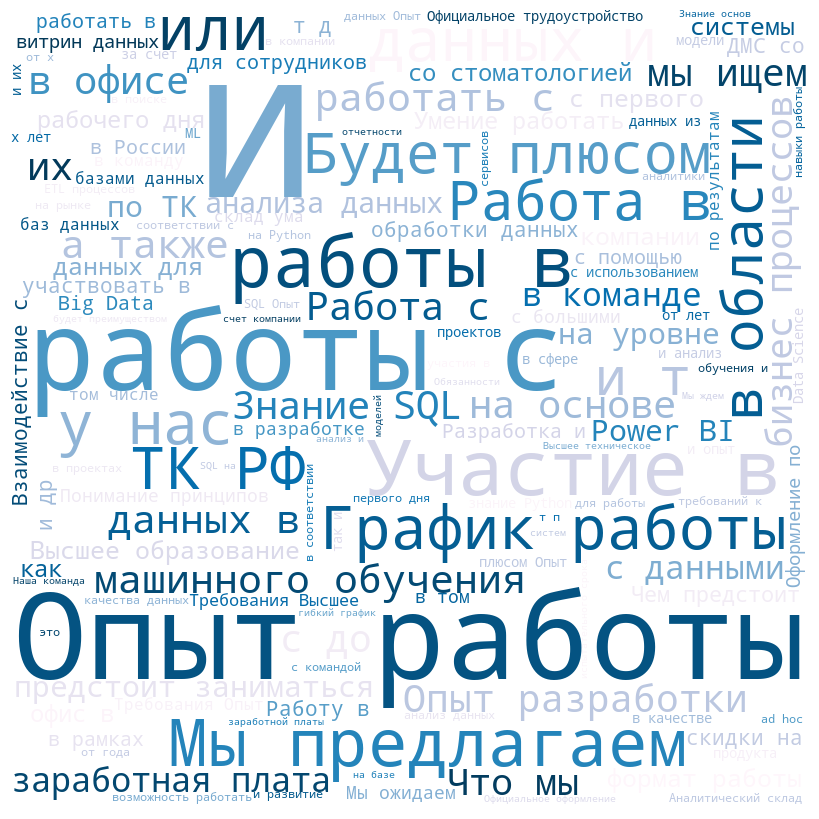

In [69]:
# Посмотрим облако слов из описания.

# Объединяем все строки в одну
text_roles = " ".join(df["description"])

# Создаем объект WordCloud
wordcloud = WordCloud(
    width=800, height=800, background_color="white", colormap="PuBu", min_font_size=10
).generate(text_roles)

# Отображаем облако слов
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Всем нужен пыт работы, -- трепещите, слушатели курсов.

Смущает малый размер слов-скилов. Попробуем убрать стоп-слова с помощью библиотеки NLTK, в которой есть список русских. Кроме того, добавим к этому списку те слова, которые по каким-то причинам попали в облако, но не устраивают нас  (самые яркие в облаке, но бесполезные). 

In [70]:
# stopwords = STOPWORDS          #stopwords.words('russian', 'english') #
# stopwords.add('Опыт работы')
# stopwords.add('стоматологией', 'и др')

# Загрузка стоп-слов
stopwords_ru = set(nltk.corpus.stopwords.words("russian"))

# Добавление дополнительных стоп-слов
custom_stopwords = set(
    [
        "Опыт работы",
        "стоматологией",
        "Работа",
        "работу",
        "Офисе",
        "Участие",
        "Предстоит заниматься",
        "предстоит заниматься",
        "предстоит",
        "заниматься",
        "ТК РФ",
        "ТК",
        "РФ",
        "Заработная плата",
        "заработная плата",
        "Опыт",
        "работы",
        "Знание",
        "Компании",
        "плюсом",
        "разработки",
        "Разработка",
        "также",
        "and",
        "Требования", 
        "график",
        "предлагаем",
        "ищу"
    ]
)

# Объединение стоп-слов
stopwords = stopwords_ru.union(custom_stopwords)


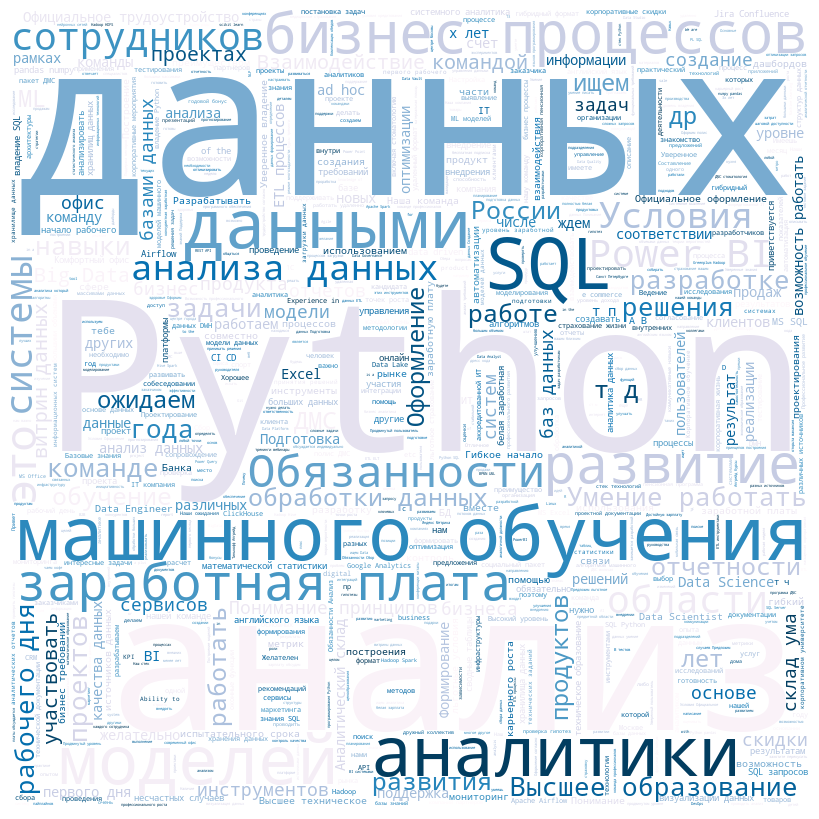

In [71]:
text_roles = " ".join(df["description"])

# Создаем объект WordCloud
skills_wc = WordCloud(
    width=800, height=800,
    background_color='white',
    colormap="PuBu",
    max_words=200000,
    stopwords=stopwords
)
# Генерация облака
skills_wc.generate(text_roles)


# Отображаем облако слов
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(skills_wc)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Уже похоже на адекватные описания вакансий по анализу данных.

Для того, чтобы обработать описания методами KMeans и DBSCAN, текст необходимо предобработать: 
- привести к одному регистру
- удалить символы пунктуации
- разбить текст на отдельные слова (токены)
- удалить стоп-слова
- лемматизировать их
- собрать обратно в текст

In [72]:
# # Загрузка стоп-слов
# nltk.download('stopwords')
# stop_words = stopwords.words('russian', 'english')

# Инициализация лемматизатора
morph = pymorphy2.MorphAnalyzer()

def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    
    # Удаление символов пунктуации
    text = re.sub(r'[^\w\s]', '', text)
    
    # Токенизация текста
    tokens = nltk.word_tokenize(text)
    
    # Удаление стоп-слов
    tokens = [token for token in tokens if token not in stopwords]
    
    # Лемматизация токенов
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    
    # Сборка предобработанного текста
    preprocessed_text = ' '.join(lemmatized_tokens) 
    
    return preprocessed_text

# Применение предобработки к столбцу 'description'
df['description_preprocessed'] = df['description'].apply(preprocess_text)

Стеммирование — это обрезание окончания слова, оставление только основы (например, “опыта работы” превратится в “опыт работ”). А лемматизация — замена слова его начальной формой (например, “мы работаем” превратится в “я работать”). 


Далее текст необходимо перевести в векторы и запустить поиск кластеров.

In [73]:
# Векторизация текста
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['description_preprocessed'])

In [74]:
# Поиск оптимального числа кластеров методом локтя
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=73)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
optimal_n_clusters = np.argmin(inertia) + 2
print('Оптимальное число кластеров (метод KMeans):', optimal_n_clusters)

# Кластеризация методом KMeans
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=73)
kmeans_labels = kmeans.fit_predict(X)
kmeans_clusters, kmeans_counts = np.unique(kmeans_labels, return_counts=True)

# Количество выбросов в методе DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=7)
dbscan_labels = dbscan.fit_predict(X)
n_outliers = np.sum(dbscan_labels == -1)

# Кластеризация методом DBSCAN
dbscan_labels[dbscan_labels != -1] = kmeans_labels[dbscan_labels != -1]  # заменяем метки KMeans на метки DBSCAN
dbscan_clusters, dbscan_counts = np.unique(dbscan_labels, return_counts=True)
dbscan_counts = dbscan_counts[dbscan_clusters != -1]  # удаляем количество выбросов из списка

# Вывод результатов
print('Число вакансий в каждом кластере (метод KMeans):')
for cluster, count in zip(kmeans_clusters, kmeans_counts):
    print(f'Кластер {cluster}: {count} вакансий')

print(f'Количество выбросов (метод DBSCAN): {n_outliers}')
print('Число вакансий в каждом кластере (метод DBSCAN):')
for cluster, count in zip(dbscan_clusters, dbscan_counts):
    print(f'Кластер {cluster}: {count} вакансий')


Оптимальное число кластеров (метод KMeans): 10
Число вакансий в каждом кластере (метод KMeans):
Кластер 0: 1 вакансий
Кластер 1: 18 вакансий
Кластер 2: 3092 вакансий
Кластер 3: 4 вакансий
Кластер 4: 6 вакансий
Кластер 5: 2031 вакансий
Кластер 6: 6 вакансий
Кластер 7: 19 вакансий
Кластер 8: 2 вакансий
Кластер 9: 1 вакансий
Количество выбросов (метод DBSCAN): 2124
Число вакансий в каждом кластере (метод DBSCAN):
Кластер -1: 15 вакансий
Кластер 1: 2979 вакансий
Кластер 2: 44 вакансий
Кластер 5: 18 вакансий


Видим, что кластеризация DBSCAN работает неподходящим для нас образом. Проставим маркировку кластеров, полученную методом Кmeans (хотя, она тоже отработала странно) и проанализируем кластеры.


In [75]:
kmeans = KMeans(n_clusters=10, random_state=73)
df['role_clusters'] = kmeans.fit_predict(X)

In [76]:
df['role_clusters'].value_counts()

role_clusters
2    3092
5    2031
7      19
1      18
6       6
4       6
3       4
8       2
0       1
9       1
Name: count, dtype: int64

In [82]:
df.loc[df['role_clusters'] == 1]

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net,description_preprocessed,role_clusters
36,79480201,Data-инженер,Знание одного из языков программирования: Pyth...,Участие в разработке ядра продуктов <highlight...,"Мы создаем собственную платформу данных, котор...",Нет опыта,2023-04-18T19:09:05+0300,2023-04-18T19:09:05+0300,https://hh.ru/vacancy/79480201,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Сочи,NaN,NaN,NaN,NaN,Открытая,Тинькофф,https://hh.ru/employer/78638,https://api.hh.ru/vacancies?employer_id=78638,Сочи,Триумфальный проезд,1,43.412297,39.965948,"Сочи, Триумфальный проезд, 1",NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,создавать собственный платформа данные который...,1
58,79478260,Data-инженер,Знание одного из языков программирования: Pyth...,Участие в разработке ядра продуктов <highlight...,"Мы создаем собственную платформу данных, котор...",От 1 года до 3 лет,2023-04-18T17:54:24+0300,2023-04-18T17:54:24+0300,https://hh.ru/vacancy/79478260,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Казань,NaN,NaN,NaN,NaN,Открытая,Тинькофф,https://hh.ru/employer/78638,https://api.hh.ru/vacancies?employer_id=78638,Казань,улица Островского,98,55.779216,49.131989,"Казань, улица Островского, 98",NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,NaN,NaN,NaN,создавать собственный платформа данные который...,1
75,79478249,Data-инженер,Знание одного из языков программирования: Pyth...,Участие в разработке ядра продуктов <highlight...,"Мы создаем собственную платформу данных, котор...",От 1 года до 3 лет,2023-04-18T17:54:03+0300,2023-04-18T17:54:03+0300,https://hh.ru/vacancy/79478249,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Иннополис,NaN,NaN,NaN,NaN,Открытая,Тинькофф,https://hh.ru/employer/78638,https://api.hh.ru/vacancies?employer_id=78638,Иннополис,Университетская улица,7,55.751872,48.752936,"Иннополис, Университетская улица, 7",NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,создавать собственный платформа данные который...,1
81,77080567,Data Engineer,Знание одного из языков программирования: Pyth...,Участие в разработке ядра продуктов <highlight...,"Мы создаем собственную платформу данных, котор...",От 3 до 6 лет,2023-04-17T06:28:11+0300,2023-04-17T06:28:11+0300,https://hh.ru/vacancy/77080567,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Екатеринбург,NaN,NaN,NaN,NaN,Открытая,Тинькофф,https://hh.ru/employer/78638,https://api.hh.ru/vacancies?employer_id=78638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,создавать собственный платформа данные который...,1
89,75833648,Data-инженер,Знание одного из языков программирования: Pyth...,Участие в разработке ядра продуктов <highlight...,"Мы создаем собственную платформу данных, котор...",От 3 до 6 лет,2023-04-18T11:28:43+0300,2023-04-18T11:28:43+0300,https://hh.ru/vacancy/75833648,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Пермь,NaN,NaN,NaN,NaN,Открытая,Тинькофф,https://hh.ru/employer/78638,https://api.hh.ru/vacancies?employer_id=78638,Пермь,улица Куйбышева,95Б,57.990775,56.247048,"Пермь, улица Куйбышева, 95Б",NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,создавать собственный платформа данные который...,1
1

In [81]:
df.loc[df['role_clusters'] == 1, 'employer.name'].value_counts()


employer.name
Тинькофф    18
Name: count, dtype: int64

In [83]:
df['employer.name'].value_counts()['Тинькофф']

98

Очевидно, что кластеризация прошла в том числе по названию компаний и их кастоимзированному способу описания (часто в вакансиях пишут информацию о компании и чем они хороши). Например, 18 вакансии Тинькофф попали в первый кластер (и 19 в седьмой). Но это ведь не значит, что они ищут лишь специалистов одного плана - в вакансиях кластера есть как DA, DE, DS, BI-специалисты. 17 из 98 вакансий Тнькофф попали в один кластер. 

Делаем вывод, что кластеризация вакансий по их описания методами KMeans и DBSCAN нам не подходит.

### Латентное распределение Дирихле (LDA)

LDA основывается на двух общих предположениях:
- Документы с похожими словами обычно имеют одну и ту же тему
- Документы, в которых группы слов часто встречаются вместе, обычно имеют одну и ту же тему.
Эти предположения имеют смысл, потому что документы, имеющие одну и ту же тему, например, бизнес-темы, будут иметь такие слова, как “экономика”, “прибыль”, “фондовый рынок”, “убыток” и т. Д. Второе предположение гласит, что если эти слова часто встречаются вместе в нескольких документах, то эти документы могут принадлежать к одной и той же категории.

Математически эти два допущения можно представить в виде:
- Документы-это распределения вероятностей по скрытым темам
- Темы-это распределения вероятностей по словам

Мы будем применять LDA к столбцу “description”, так как он содержит описания, остальные столбцы будут проигнорированы.

Прежде чем мы сможем применить LDA, нам нужно создать словарь всех слов в наших данных. Сделаем это с помощью счетчика. Посмотрите на следующий сценарий:

In [85]:
df['description'].head()

0    Ищу Data Engineer в SportTech компанию Sportra...
1    В крупную исследовательскую компанию, специали...
2    НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! ЧИТАЙТЕ ИНФО...
3    Приветствуем тебя, будущий участник нашей прог...
4    Что нужно будет делать:  Проектировать, разраб...
Name: description, dtype: object

In [89]:
# import gensim
# from gensim.utils import simple_preprocess
# import nltk

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True убирает пунктуацию
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stopwords] for doc in texts]
# data = df['description'].values.tolist()
# data_words = list(sent_to_words(data))
# # убираем стоп-слова и выводим первые 30 слов первого элемента списка
# data_words = remove_stopwords(data_words)
# print(data_words[:1][0][:30])

['data', 'engineer', 'sporttech', 'компанию', 'sportradar', 'sportradar', 'крупнеишии', 'проваидер', 'спортивных', 'данных', 'мире', 'работают', 'fifa', 'uefa', 'nba', 'nhl', 'itf', 'многими', 'другими', 'торгуются', 'nasdaq', 'нанятыи', 'человек', 'присоединится', 'annotation', 'labeling', 'команде', 'computer', 'vision', 'продуктах']


In [97]:
import gensim
from gensim.utils import simple_preprocess
import nltk

# добавляем свои стоп-слова
my_stopwords = [
        "Опыт работы",
        "стоматологией",
        "Работа",
        "работу",
        "Офисе",
        "Участие",
        "Предстоит заниматься",
        "предстоит заниматься",
        "предстоит",
        "заниматься",
        "ТК РФ",
        "ТК",
        "РФ",
        "Заработная плата",
        "заработная плата",
        "Опыт",
        "работы",
        "Знание",
        "Компании",
        "плюсом",
        "разработки",
        "Разработка",
        "также",
        "and",
        "Требования", 
        "график",
        "предлагаем",
        "ищу"
    ]

# объединяем со стандартными стоп-словами из NLTK
stopwords = nltk.corpus.stopwords.words('russian') + my_stopwords

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True убирает пунктуацию
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stopwords] for doc in texts]

data = df['description'].values.tolist()
data_words = list(sent_to_words(data))
# убираем стоп-слова и выводим первые 30 слов первого элемента списка
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


['data', 'engineer', 'sporttech', 'компанию', 'sportradar', 'sportradar', 'крупнеишии', 'проваидер', 'спортивных', 'данных', 'мире', 'работают', 'fifa', 'uefa', 'nba', 'nhl', 'itf', 'многими', 'другими', 'торгуются', 'nasdaq', 'нанятыи', 'человек', 'присоединится', 'annotation', 'labeling', 'команде', 'computer', 'vision', 'продуктах']


В приведенном выше  коде происходит предобработка текстовых данных для дальнейшего анализа с использованием библиотеки gensim.

Функция sent_to_words принимает список предложений и с помощью simple_preprocess из библиотеки gensim проводит простейшую предобработку, разбивая каждое предложение на отдельные токены и удаляя пунктуацию. Функция yield возвращает каждое предложение в виде списка токенов.

Функция remove_stopwords принимает на вход список списков токенов, представляющий собой выходной параметр из функции sent_to_words. Затем она проводит фильтрацию стоп-слов с помощью условного оператора и возвращает на выходе обновленный список токенов.

В основном коде data представляет собой список предобработанных текстов, из которых с помощью list(sent_to_words) создается список списков токенов data_words. Затем применяется функция remove_stopwords для фильтрации стоп-слов, и первые 30 слов первого элемента списка выводятся с помощью print

In [98]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 2), (2, 1), (3, 3), (4, 1), (5, 1), (6, 5), (7, 2), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [99]:
from pprint import pprint

# Количество тем
num_topics = 6

# Строим модель LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

В приведенном выше скрипте мы используем выполненяем LDA на нашей матрице терминов документа. Параметр num_topics определяет количество категорий или тем, на которые мы хотим разделить наш текст. 

In [100]:
# Выведем ключевые слова в наших темах
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]
# Для каждого описания получим номер темы
topics = [max(prob, key=lambda y: y[1])[0] for prob in doc_lda]

# И проставим их в новый столбец
df['topic_num'] = topics

[(0,
  '0.019*"данных" + 0.012*"опыт" + 0.006*"компании" + 0.005*"бизнес" + '
  '0.005*"знание" + 0.005*"sql" + 0.005*"анализ" + 0.004*"data" + '
  '0.003*"работа" + 0.003*"возможность"'),
 (1,
  '0.017*"данных" + 0.014*"опыт" + 0.006*"data" + 0.006*"знание" + '
  '0.005*"компании" + 0.004*"sql" + 0.004*"python" + 0.004*"моделеи" + '
  '0.004*"бизнес" + 0.003*"умение"'),
 (2,
  '0.014*"данных" + 0.012*"опыт" + 0.006*"знание" + 0.005*"компании" + '
  '0.005*"data" + 0.004*"бизнес" + 0.004*"sql" + 0.003*"возможность" + '
  '0.003*"работа" + 0.003*"python"'),
 (3,
  '0.012*"опыт" + 0.011*"данных" + 0.005*"компании" + 0.005*"знание" + '
  '0.004*"бизнес" + 0.004*"data" + 0.004*"python" + 0.004*"возможность" + '
  '0.004*"умение" + 0.003*"sql"'),
 (4,
  '0.018*"данных" + 0.016*"опыт" + 0.006*"data" + 0.004*"компании" + '
  '0.004*"sql" + 0.004*"бизнес" + 0.004*"возможность" + 0.004*"знание" + '
  '0.003*"of" + 0.003*"to"'),
 (5,
  '0.017*"данных" + 0.014*"опыт" + 0.007*"знание" + 0.006*"sql

#### Анализ результатов модели LDA

Теперь, когда у нас есть обученная модель, давайте визуализируем темы для возможности их интерпретации. Для этого мы будем использовать популярный пакет визуализации pyLDAvis, который разработан для интерактивной работы, чтобы:

* Лучше понимать и интерпретировать отдельные темы
* Лучше понимать отношения между темами

In [101]:
# Импортируем необходимые библиотеки pyLDAvis.gensim, pickle и pyLDAvis.
# Включаем возможность вывода визуализации pyLDAvis в блокноте.
# Задаем путь и имя файла, в котором будет сохранена подготовленная визуализация.
# Если условие выполняется (1==1), подготавливаем визуализацию, сохраняем в pickle-файл.
# Загружаем ранее сохраненную визуализацию из файла.
# Выводим подготовленную визуализацию.
# Сохраняем готовую html-страницу визуализации.
# Выводим подготовленную визуализацию.


import pyLDAvis.gensim
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.010302 -0.003172       1        1  28.905095
0      0.008235 -0.000289       2        1  25.691040
1      0.000796  0.010182       3        1  17.720453
4     -0.007337 -0.002413       4        1  13.143298
3     -0.008780  0.000828       5        1   7.487037
2     -0.003216 -0.005136       6        1   7.053077, topic_info=          Term         Freq        Total Category  logprob  loglift
388       опыт  5773.000000  5773.000000  Default  30.0000  30.0000
63      данных  7220.000000  7220.000000  Default  29.0000  29.0000
6         data  2146.000000  2146.000000  Default  28.0000  28.0000
334   компании  2187.000000  2187.000000  Default  27.0000  27.0000
203     знание  2479.000000  2479.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
200      задач    64.481370   916.843540   Topic6  -6.1506  -0.0029
307        дмс    68.010658  1067.251249   Topic6  -6.0973  -0.1015
734     задачи    68.574965  1109.323064   Topic6  -6.0891  -0.1319
662    моделеи    69.823719  1186.027213   Topic6  -6.0710  -0.1807
884  процессов    68.357810  1276.783763   Topic6  -6.0922  -0.2756

[542 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
8655       1  0.154428  ability
8655       2  0.169870  ability
8655       3  0.154428  ability
8655       4  0.262527  ability
8655       5  0.108099  ability
...      ...       ...      ...
13528      4  0.098259     ялте
13528      6  0.098259     ялте
3217       1  0.474144       яо
21593      1  0.243765     ярко
21593      2  0.487531     ярко

[1337 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 2, 5, 4, 3])

Проанализируем полученные результаты с помощью крос-таблицы: столбцами будут полученные темы, строками названия вакансий. Выведем топ-20.

In [122]:
table = pd.crosstab(df.name, df.topic_num)
table['sum'] = table.sum(axis=1)
sorted_table = table.sort_values(by='sum', axis=0, ascending=False)
top_20 = sorted_table.head(20)
print(top_20)


topic_num                    0   1   2   3   4   5  sum
name                                                   
Аналитик                   324   7  18  10  12  58  429
Бизнес-аналитик            225   1   4   3   6  13  252
Системный аналитик         144   5   3   0   5  24  181
Аналитик данных             92   5   3   6   8  28  142
Маркетолог-аналитик        105   0   1   0   1   5  112
Data Engineer               27  15   1   5   6  37   91
Финансовый аналитик         84   0   0   1   0   1   86
Экономист-аналитик          82   0   1   0   0   1   84
Аналитик отдела продаж      35   0   5   1   2   1   44
Data Scientist               5  21   1   5   3   7   42
Продуктовый аналитик        25   2   4   2   1   4   38
Ведущий аналитик            30   0   2   0   1   3   36
Data Analyst                 9  10   1   0   4   9   33
Аналитик BI                 22   0   1   1   0   7   31
Системный аналитик DWH      29   0   0   0   1   0   30
Младший аналитик            23   1   2   1   1  

Результаты разочаровывают:
- Больше всего вакансий в нулевой группе


In [ ]:
# определим 
def top_keys(df):
    # Collect keys from dataframe
    keys_df = df['description'].to_list()
    
    # Create a list of keys for all vacancies
    lst_keys = []
    for keys_elem in keys_df:
        for el in keys_elem[1:-1].split(', '):
            if el != '':
                lst_keys.append(re.sub('\'', '', el.lower()))

    # Unique keys and their counter
    set_keys = set(lst_keys)
    # Dict: {Key: Count}
    dct_keys = {el:lst_keys.count(el) for el in set_keys}
    # Sorted dict
    srt_keys = dict(sorted(dct_keys.items(), key=lambda x: x[1], reverse=True))
    # Return pandas series
    return pd.Series(srt_keys, name='Keys')

ds_keys = top_keys(df)

print(ds_keys[:30])

In [ ]:
print(ds_keys[:30])

In [ ]:
df.loc[
    df["description"].str.contains("kafka")]

In [ ]:
# Выведем топ-50 слов, встречающихся в описаниях
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# объединяем все описания в одну строку
text = ' '.join(df['description_preprocessed'].astype(str).tolist())

# токенизируем текст на слова
tokens = word_tokenize(text)

# создаем частотный словарь
freq_dist = FreqDist(tokens)

# выводим топ-50 слов
top_words = freq_dist.most_common(100)
print(top_words)


Зарплаты указаны в 20% вакансий. Попробуем предсказать зарплаты методом машиннного обучения. Для этого нам необходимо заполнить пропущенные значения вакансий, перевести все зарплаты в рубли и вычесть налог там, где вознаграждение указано гросс 

In [ ]:
df.head(3)

In [ ]:
# среднее значение столбцов salary.from и salary.to
mean_salary = (df['salary.from'] + df['salary.to']) / 2

# умножаем на курс валют (по данным ЦБ РФ
# https://www.cbr.ru/currency_base/daily/)
# и находим медианную зарплату

currency_coef = df['salary.currency'].map({'EUR': 89.5, 'USD': 81.6, 'RUR': 1})
mean_salary = mean_salary * currency_coef

# вычетаем подоходный налог, если значение в столбце salary.gross равно True
mean_salary = np.where(df['salary.gross'], mean_salary * 0.87, mean_salary)

# преобразуем numpy массив обратно в объект pandas DataFrame
mean_salary = pd.DataFrame(mean_salary, columns=['salary.temp'])

# заполняем пропущенные значения медианой
median_salary = mean_salary.median()
mean_salary = mean_salary.fillna(median_salary)

# создаем столбец salary.net
df['salary.net'] = mean_salary

In [ ]:
df.head()

In [ ]:
d_grouped

In [ ]:
# def get_description_from_api(vacancy_id):
#     """
#     Получает описание вакансии по её id через API hh.ru.
    
#     :param vacancy_id: id вакансии.
#     :return: Описание вакансии.
#     """
#     # Задаем параметры запроса.
#     params = {
#         'host': 'https://api.hh.ru',
#         'user_agent': 'api-test-agent/1.0',
#         'headers': {
#             'User-Agent': 'api-test-agent/1.0'
#         }
#     }
    
#     # Формируем URL запроса.
#     url = f"{params['host']}/vacancies/{vacancy_id}"
    
#     # Отправляем запрос к API.
#     response = requests.get(url, headers=params['headers'])
    
#     # Обрабатываем результат запроса.
#     if response.status_code == 200:
#         vacancy_data = response.json()
#         description = vacancy_data['description']
#         return description
#     else:
#         return None


# def add_description_to_dataframe(df):
#     """
#     Добавляет описание вакансии в датафрейм.
    
#     :param df: Датафрейм с вакансиями.
#     :return: Датафрейм с добавленными описаниями вакансий.
#     """
#     # Создаем новый столбец для описаний вакансий.
#     df['description'] = None
    
#     # Проходим по всем вакансиям в датафрейме.
#     for index, row in df.iterrows():
#         # Получаем id вакансии.
#         vacancy_id = row['id']
        
#         # Получаем описание вакансии.
#         description = get_description_from_api(vacancy_id)
        
#         # Записываем описание вакансии в датафрейм.
#         df.at[index, 'description'] = description
    
#     return df

In [ ]:
# # Получаем описания для каждой вакансии датафрейма, записываем результат

# def get_description(vacancy_id):
#     url = f'https://api.hh.ru/vacancies/{vacancy_id}'
#     headers = {'User-Agent': 'Mozilla/5.0'}
#     description = ""
#     while True:
#         try:
#             response = requests.get(url, headers=headers)
#             if response.ok:
#                 data = response.json()
#                 description = data['description']
#             break
#         except requests.exceptions.RequestException:
#             print(f"Ошибка получения описания вакансии {vacancy_id}. Повтор запроса через 5 секунд.")
#             time.sleep(5)
#             continue
#     return description

# # Применяем функцию для каждой вакансии в датафрейме и записываем результат в новый столбец
# df['description'] = df['id'].apply(get_description)


In [ ]:
# # Проверяем, что все значения в столбце id являются строками
# print(df['id'].apply(type).value_counts())

# # Преобразуем все значения в столбце id в строковый тип
# df['id'] = df['id'].astype(str)

# Выбираем только уникальные идентификаторы вакансий
unique_ids = df['id'].unique()
print(len(unique_ids))

# Проверяем, что количество уникальных идентификаторов вакансий совпадает с общим количеством вакансий в датафрейме
print(len(unique_ids) == len(df))


In [ ]:
# # Выбираем первые 10 вакансий и выводим их описание
# for index, row in df.head(10).iterrows():
#     print(get_description(row['id']))


In [ ]:
# get_description(79110745)

In [ ]:
# def get_description(vacancy_id):
#     url = f'https://api.hh.ru/vacancies/{vacancy_id}'
#     headers = {'User-Agent': 'Mozilla/5.0'}
#     description = ""
#     while True:
#         try:
#             response = requests.get(url, headers=headers)
#             if response.ok:
#                 data = response.json()
#                 description = data['description']
#                 break
#         except requests.exceptions.RequestException:
#             print(f"Ошибка получения описания вакансии {vacancy_id}. Повтор запроса через 5 секунд.")
#             time.sleep(5)
#             continue
#     return description


In [ ]:
# df.description.unique()

In [ ]:
df['type.name'].unique()

In [ ]:
df.loc[df['type.name'] == 'Рекламная']

In [ ]:
df.info()

In [ ]:
# # Напишем функцию, которая переведет все столбцы датасета в numeric
# # Если это столбец с датой, переводим в формат datetime

# def convert_columns(df):
#     for col in df.columns:
#         if 'date' in col.lower():
#             try:
#                 df[col] = pd.to_datetime(df[col])
#             except:
#                 pass
#         else:
#             try:
#                 df[col] = df[col].astype(float)
#             except:
#                 pass
#     return df

In [ ]:
# df = convert_columns(df)

In [ ]:
# Уберем теги из описаний вакансий при помощи ранее созданной функции

df[['description']] = df[['description']].applymap(remove_tags)

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Количество цифровых признаков -- {len(numeric_cols)}')
print(f'Цифровые признаки: {numeric_cols}')
print(f'Количество строковых признаков -- {len(categorical_cols)}')
print(f'Строковые признаки: {categorical_cols}')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), ax=ax)
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
df.describe()


Кластеризация текстовых данных - это сложная задача машинного обучения, но можно использовать различные методы для ее решения. Вот несколько подходов:

1.Кластеризация на основе слов: вы можете использовать методы машинного обучения, такие как K-средних или DBSCAN, чтобы кластеризовать описания вакансий на основе слов в тексте. В этом случае вам нужно будет создать матрицу признаков, используя методы векторизации, такие как TF-IDF или Word2Vec, чтобы преобразовать текст в числовые значения. Затем можно использовать эти числа в качестве входных данных для алгоритма кластеризации.

2.Кластеризация на основе тем: другой подход - использовать тематическое моделирование для кластеризации описаний вакансий на основе тем, которые встречаются в тексте. Например, можно использовать методы LDA (Latent Dirichlet Allocation) или NMF (Non-Negative Matrix Factorization), чтобы найти темы, связанные с определенными профессиональными навыками или областями. Затем можно кластеризовать описания вакансий на основе этих тем.

3.Кластеризация на основе эмбеддингов: еще один подход - использовать предварительно обученные модели эмбеддингов (например, Word2Vec или GloVe), чтобы преобразовать текст в числовые векторы, представляющие значения слов. Затем можно использовать алгоритмы кластеризации, такие как DBSCAN или AgglomerativeClustering, чтобы кластеризовать описания вакансий на основе этих эмбеддингов.

Какой из этих подходов выбрать зависит от вашей задачи и доступных ресурсов. В любом случае, для успешной кластеризации необходимо иметь достаточно большой и разнообразный набор данных.

Воспользуемся Word2Vec:

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
# Создадим список списков слов для обучения модели Word2Vec. Для этого необходимо разбить каждое предложение 
# на список отдельных слов и добавить каждый список в основной список.

sentences = df["snippet.requirement"].apply(lambda x: x.split() if x else [])

In [ ]:
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)


In [ ]:
vectors = df['snippet.requirement'].apply(lambda x: model.wv[x.split()]).tolist()

In [ ]:
df['snippet.requirement'].isna().sum()

In [ ]:
df.shape

In [ ]:
df = df.dropna(subset=['snippet.requirement'])

In [ ]:
df.shape

In [ ]:
import numpy as np
vectors = np.array(df['snippet.requirement'].apply(lambda x: model.wv[x.split()]).tolist())


Для кластеризации векторов описаний вакансий можно использовать алгоритм кластеризации KMeans, который является одним из наиболее распространенных методов машинного обучения для кластеризации данных.

In [ ]:
from sklearn.cluster import KMeans

# Выберем количество кластеров
num_clusters = 10

# Инициализируем kmeans
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100)

# Обучаем kmeans на наших векторах
X = vectors
kmeans.fit(X)

# Получаем метки кластеров для наших векторов
cluster_labels = kmeans.labels_


In [ ]:
# Ошибка выше происходит из-за того, что массив содержит векторы разной длины
# Определим максимальную длину вектора среди всех векторов в списке:
max_len = max(len(v) for v in vectors)

# Добавим недостающие элементы в конец каждого вектора, заполнив их нулями:
for i, v in enumerate(vectors):
    vectors[i] = np.pad(v, (0, max_len - len(v)), 'constant')